In [234]:
from __future__ import division
from math import *
import numpy as np
import sys
import os
from matplotlib.ticker import LogFormatter
from matplotlib.ticker import LogFormatterExponent
from matplotlib.ticker import LogFormatterSciNotation
import matplotlib.colors as colors

import pandas as pd
import numpy as np
import matplotlib, os
import matplotlib.pyplot as plt
# Matplotlib configuration
matplotlib.rcParams['text.usetex'] = True
#matplotlib.rcParams['text.latex.unicode'] = True
matplotlib.style.use('classic')
plt.rcParams['xtick.direction']     = 'in'
plt.rcParams['ytick.direction']     = 'in'
plt.rcParams['xtick.top']           = True
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.right']         = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import matplotlib.cm as cm

from matplotlib import pyplot
matplotlib.rcParams['text.usetex'] = True
#matplotlib.rcParams['text.latex.unicode'] = True
matplotlib.rc('text', usetex = True)
matplotlib.rc('font', **{'family' : "sans-serif"})
params= {'text.latex.preamble' : [r'\usepackage{amssymb}']}
pyplot.rcParams.update(params)

from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import FuncFormatter
from scipy.interpolate import griddata
from scipy.interpolate import interp1d
from shapely.geometry import Point, Polygon

import plotly.express as px
import ternary
import mpltern
import copy

/Users/oozdal/opt/anaconda3/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


In [235]:
exec(open("/Users/oozdal/packages/ExpDATA/ExDATA.py").read())

In [236]:
#combine all files in the list
mainpath = "/Users/oozdal/projects/MagMoment/Scan/data/"
all_filenames = ["NonUMSSMv4_Chi1LSP_1.csv","NonUMSSMv4_Chi1LSP_2.csv","NonUMSSMv4_Chi1LSP_3.csv"]
combined_csv = pd.concat([pd.read_csv(mainpath+f, header=None, sep=" ") for f in all_filenames ])
#export to csv
#combined_csv.to_csv(mainpath+"Combined_NonUMSSMv4_Chi1LSP.csv", index=False, encoding='utf-8-sig')

combined_csv.columns =["MZp", "ZpWidthOverMass","BRZptoll","BRZptoqq","gpSUSY","DAEL","DAMU","Chi1","Chi2","Cha1","BRCha1toWChi1", "BRZptoCha1Cha1", "chi2STU", "Sv1", "TanBeta", \
           "Lambda","TLambda","vS", "NMIX11","NMIX12","NMIX13","NMIX14","NMIX15","NMIX16", "Se1", "M1", "M2", "M3", "M4", "Tep", "Tmup","TYe33", "WhoIsLSP", \
           "RelicDensity", "xsecpptoZp", "SIproton", "SIneutron", "sigmaV", "DAELDAMU_Sigma", "Selectron1", "Selectron2", "Smuon1", "Smuon2", "Stau1", "Stau2", \
           "i", "j", "m0", "M1IN", "M2IN", "M3IN", "M4IN", "A0", "ME012", "ME022", "ME032", 
             "ML012", "ML022", "ML032", "MVR012", "MVR022", "MVR032", "Ql1", "Ql2", "Qe1", "Qe2", "Chi3", "Cha2", "hh1", "hh1tomumu", "hh1toee"]

df = copy.deepcopy(combined_csv)
df.reset_index(drop=True, inplace=True)

# Let's see a few lines 
df.head()

MZp  ZpWidthOverMass  BRZptoll  BRZptoqq    gpSUSY          DAEL  \
0  7204.035         0.015277  0.082841  0.451902  0.461024 -8.034424e-13   
1  6813.462         0.017409  0.118714  0.281977  0.483480 -5.297234e-13   
2  6299.864         0.015051  0.054434  0.408094  0.471490 -1.077944e-12   
3  7875.719         0.017424  0.041804  0.445308  0.471660 -6.679858e-13   
4  5058.067         0.014700  0.205433  0.265605  0.501219 -2.060117e-13   

           DAMU       Chi1       Chi2       Cha1  ...      MVR032       Ql1  \
0  4.400268e-10  1419.0180  3251.0620  3249.8520  ...   6474949.0 -0.142857   
1  9.606797e-10   992.6819 -1003.7620   995.1132  ...  13737130.0 -0.333333   
2  7.365571e-10   455.8807  1681.9910   456.0103  ...  13204580.0  0.333333   
3  1.129891e-09   757.6544  -777.1562   759.0685  ...  12752490.0 -0.333333   
4  1.287903e-09  1713.4500  1713.8960  1714.5180  ...   6035462.0 -0.250000   

        Ql2       Qe1       Qe2       Chi3       Cha2       hh1  hh1tomumu  \
0 -0.571429 -0.285714  0.142857 -3361.7520  3406.1470  123.5929   0.000338   
1 -0.666667  0.000000  0.333333  1381.5610  1380.9450  124.2636   0.000330   
2  0.166667  0.166667  0.333333 -2298.2280  2299.4430  126.3726   0.000301   
3 -0.111111 -0.111111 -0.333333   951.0969   951.2761  124.7763   0.000323   
4  0.625000  0.625000 -0.250000 -1977.1620  2914.2930  123.3194   0.000347   

   hh1toee  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0  

[5 rows x 71 columns]

In [237]:
# Let's slice and reorder the dataframe
df_sub = df[['DAEL','DAMU','vS','gpSUSY','MZp','Lambda','TLambda','TYe33','Tep','Tmup','M1','M2','M3','M4', \
             'Chi1','Cha1','TanBeta', 'DAELDAMU_Sigma', "WhoIsLSP", "RelicDensity", "xsecpptoZp", "SIproton", "SIneutron", "sigmaV",
             'NMIX11', 'NMIX12', 'NMIX13', 'NMIX14', 'NMIX15', 'NMIX16',"BRZptoll", "Selectron1", "Selectron2", "Smuon1", "Smuon2",
             "Stau1", "Stau2", "i", "j", "m0", "M1IN", "M2IN", "M3IN", "M4IN", "A0", "ME012", "ME022", "ME032", 
             "ML012", "ML022", "ML032", "MVR012", "MVR022", "MVR032", "Chi2", "Chi3", "Cha2", "hh1", "hh1tomumu", "Ql2", "Qe2", "hh1toee"]]
# Let's see a few lines 
df_sub.head()

DAEL          DAMU        vS    gpSUSY       MZp    Lambda  \
0 -8.034424e-13  4.400268e-10  15554.40  0.461024  7204.035  0.304238   
1 -5.297234e-13  9.606797e-10  16806.53  0.483480  6813.462  0.082405   
2 -1.077944e-12  7.365571e-10  13375.53  0.471490  6299.864  0.240866   
3 -6.679858e-13  1.129891e-09  16618.48  0.471660  7875.719  0.064426   
4 -2.060117e-13  1.287903e-09  13379.48  0.501219  5058.067  0.178568   

      TLambda     TYe33       Tep      Tmup  ...      MVR022      MVR032  \
0   5733.4860  -59.1215 -3204.901  4354.516  ...  29512600.0   6474949.0   
1   1197.3230 -285.3034 -3026.312  5271.951  ...  29315290.0  13737130.0   
2   8512.0870  -80.1817 -2638.551  8103.340  ...  13442870.0  13204580.0   
3  13146.3200   40.3030  2366.987 -5144.933  ...  23169300.0  12752490.0   
4    808.6221 -168.7672  1887.456 -8119.648  ...  12307370.0   6035462.0   

        Chi2       Chi3       Cha2       hh1  hh1tomumu       Ql2       Qe2  \
0  3251.0620 -3361.7520  3406.1470  123.5929   0.000338 -0.571429  0.142857   
1 -1003.7620  1381.5610  1380.9450  124.2636   0.000330 -0.666667  0.333333   
2  1681.9910 -2298.2280  2299.4430  126.3726   0.000301  0.166667  0.333333   
3  -777.1562   951.0969   951.2761  124.7763   0.000323 -0.111111 -0.333333   
4  1713.8960 -1977.1620  2914.2930  123.3194   0.000347  0.625000 -0.250000   

   hh1toee  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0  

[5 rows x 62 columns]

In [238]:
# Let's see the solutions with electron g-2 (DAEL) and muon g-2 (DAMU) is within 1,2 and 3 sigma!
df_sub_123sigma = df_sub[(df_sub['DAELDAMU_Sigma'].values != None )]

# Let's see a few lines 
df_sub_123sigma.head()

DAEL          DAMU        vS    gpSUSY       MZp    Lambda  \
0 -8.034424e-13  4.400268e-10  15554.40  0.461024  7204.035  0.304238   
1 -5.297234e-13  9.606797e-10  16806.53  0.483480  6813.462  0.082405   
2 -1.077944e-12  7.365571e-10  13375.53  0.471490  6299.864  0.240866   
3 -6.679858e-13  1.129891e-09  16618.48  0.471660  7875.719  0.064426   
4 -2.060117e-13  1.287903e-09  13379.48  0.501219  5058.067  0.178568   

      TLambda     TYe33       Tep      Tmup  ...      MVR022      MVR032  \
0   5733.4860  -59.1215 -3204.901  4354.516  ...  29512600.0   6474949.0   
1   1197.3230 -285.3034 -3026.312  5271.951  ...  29315290.0  13737130.0   
2   8512.0870  -80.1817 -2638.551  8103.340  ...  13442870.0  13204580.0   
3  13146.3200   40.3030  2366.987 -5144.933  ...  23169300.0  12752490.0   
4    808.6221 -168.7672  1887.456 -8119.648  ...  12307370.0   6035462.0   

        Chi2       Chi3       Cha2       hh1  hh1tomumu       Ql2       Qe2  \
0  3251.0620 -3361.7520  3406.1470  123.5929   0.000338 -0.571429  0.142857   
1 -1003.7620  1381.5610  1380.9450  124.2636   0.000330 -0.666667  0.333333   
2  1681.9910 -2298.2280  2299.4430  126.3726   0.000301  0.166667  0.333333   
3  -777.1562   951.0969   951.2761  124.7763   0.000323 -0.111111 -0.333333   
4  1713.8960 -1977.1620  2914.2930  123.3194   0.000347  0.625000 -0.250000   

   hh1toee  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0  

[5 rows x 62 columns]

In [239]:
# Let's see the solutions with electron g-2 (DAEL) and muon g-2 (DAMU) is within only 3 sigma!
df_sub_3sigma = df_sub[(df_sub['DAELDAMU_Sigma'] == "3sigma")]

# Let's see a few lines 
df_sub_3sigma.head()

DAEL          DAMU        vS    gpSUSY       MZp    Lambda  \
0 -8.034424e-13  4.400268e-10  15554.40  0.461024  7204.035  0.304238   
1 -5.297234e-13  9.606797e-10  16806.53  0.483480  6813.462  0.082405   
2 -1.077944e-12  7.365571e-10  13375.53  0.471490  6299.864  0.240866   
3 -6.679858e-13  1.129891e-09  16618.48  0.471660  7875.719  0.064426   
4 -2.060117e-13  1.287903e-09  13379.48  0.501219  5058.067  0.178568   

      TLambda     TYe33       Tep      Tmup  ...      MVR022      MVR032  \
0   5733.4860  -59.1215 -3204.901  4354.516  ...  29512600.0   6474949.0   
1   1197.3230 -285.3034 -3026.312  5271.951  ...  29315290.0  13737130.0   
2   8512.0870  -80.1817 -2638.551  8103.340  ...  13442870.0  13204580.0   
3  13146.3200   40.3030  2366.987 -5144.933  ...  23169300.0  12752490.0   
4    808.6221 -168.7672  1887.456 -8119.648  ...  12307370.0   6035462.0   

        Chi2       Chi3       Cha2       hh1  hh1tomumu       Ql2       Qe2  \
0  3251.0620 -3361.7520  3406.1470  123.5929   0.000338 -0.571429  0.142857   
1 -1003.7620  1381.5610  1380.9450  124.2636   0.000330 -0.666667  0.333333   
2  1681.9910 -2298.2280  2299.4430  126.3726   0.000301  0.166667  0.333333   
3  -777.1562   951.0969   951.2761  124.7763   0.000323 -0.111111 -0.333333   
4  1713.8960 -1977.1620  2914.2930  123.3194   0.000347  0.625000 -0.250000   

   hh1toee  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0  

[5 rows x 62 columns]

In [240]:
# Let's see the solutions with electron g-2 (DAEL) and muon g-2 (DAMU) is within 2 sigma!
df_sub_2sigma = df_sub[(df_sub['DAELDAMU_Sigma'] == "2sigma")]

# Let's see a few lines 
df_sub_2sigma.head()

DAEL          DAMU        vS    gpSUSY       MZp    Lambda  \
5  -8.214394e-13  1.392978e-09  13897.28  0.465065  6465.236  0.365956   
6  -3.772227e-13  2.238636e-09  13321.33  0.452920  6050.331  0.280865   
8  -6.736293e-13  1.506294e-09  13138.59  0.455772  5361.502  0.172840   
12 -7.931820e-13  1.707081e-09  16195.88  0.454807  7403.426  0.239686   
16 -1.739835e-13  4.134452e-09  14483.47  0.470734  6806.706  0.265843   

      TLambda      TYe33        Tep      Tmup  ...      MVR022      MVR032  \
5    9836.047  154.73240 -5211.9120  6958.416  ...  29899120.0  24011030.0   
6   11462.620   21.82407  1078.5880 -6053.333  ...  21679650.0  22782180.0   
8    5783.919  -17.34576  5580.7650 -3799.817  ...   7450454.0   1154875.0   
12  12509.980  179.93200 -4620.4400  6342.960  ...  26812610.0   9052405.0   
16   8519.303  203.98760   296.5607 -5554.581  ...  23606750.0   6523078.0   

        Chi2      Chi3      Cha2       hh1  hh1tomumu       Ql2       Qe2  \
5  -3025.016  3612.303  3616.535  124.7034   0.000339  0.285714  0.142857   
6  -1445.103  2676.997  2677.959  126.3885   0.000304  0.142857 -0.714286   
8   1358.594 -1630.282  1643.486  123.5102   0.000339  0.111111 -0.666667   
12 -2784.063  2788.680  3480.931  123.0632   0.000362 -0.142857 -0.428571   
16 -2723.186  2742.489  2878.550  127.5192   0.000293 -0.222222 -0.222222   

    hh1toee  
5       0.0  
6       0.0  
8       0.0  
12      0.0  
16      0.0  

[5 rows x 62 columns]

In [241]:
# Let's see the solutions with electron g-2 (DAEL) and muon g-2 (DAMU) is within 1 sigma!
df_sub_1sigma = df_sub[(df_sub['DAELDAMU_Sigma'] == "1sigma")]

# Let's see a few lines 
df_sub_1sigma.head()

DAEL          DAMU        vS    gpSUSY       MZp    Lambda  \
13 -7.849337e-13  2.344367e-09  15083.27  0.459846  6953.568  0.259576   
15 -4.827529e-13  3.636135e-09  18054.95  0.472235  8530.457  0.312874   
17 -4.741351e-13  3.718716e-09  13260.50  0.475063  5749.911  0.158407   
22 -7.236331e-13  2.272616e-09  15341.59  0.499106  6021.505  0.159302   
31 -7.788465e-13  2.434830e-09  14932.72  0.466821  7005.968  0.363248   

     TLambda      TYe33       Tep      Tmup  ...      MVR022      MVR032  \
13  6703.723   69.26757  1901.987 -8515.310  ...  22791420.0   5822786.0   
15  4400.941  260.31190 -1374.265  9480.184  ...  12187140.0  26995170.0   
17  8494.381  344.35430  4853.156 -7660.233  ...  29327430.0  25054220.0   
22  9133.576  430.98750  4580.579 -8184.417  ...  31030730.0  25770840.0   
31  5103.923  169.30600  5949.608 -6538.561  ...  21299540.0  21634370.0   

        Chi2      Chi3      Cha2       hh1  hh1tomumu       Ql2       Qe2  \
13 -1854.152  2788.653  2789.581  124.8349   0.000342  0.571429 -0.142857   
15 -2575.734  4022.971  4024.829  122.7391   0.000376 -0.222222 -0.222222   
17  1206.640 -1517.607  1526.902  126.1125   0.000312 -0.200000  0.600000   
22  1284.764 -1756.539  1762.633  125.9261   0.000320  0.111111 -0.444444   
31 -1825.666  3880.545  3881.814  125.3232   0.000326 -0.285714 -0.142857   

    hh1toee  
13      0.0  
15      0.0  
17      0.0  
22      0.0  
31      0.0  

[5 rows x 62 columns]

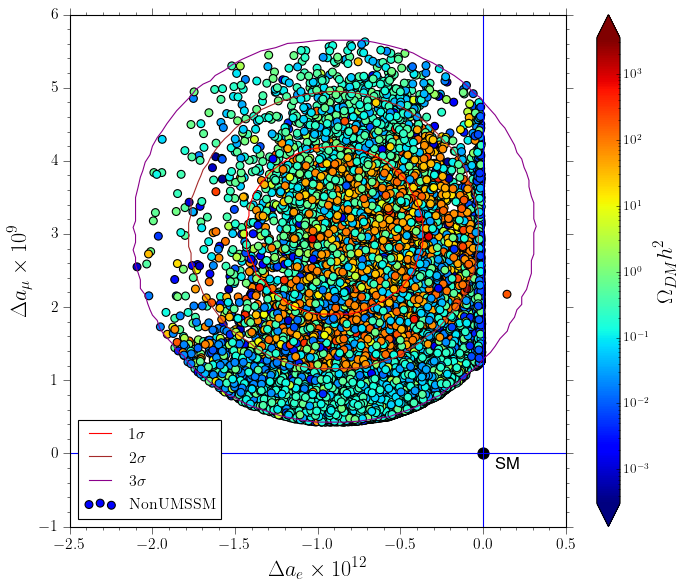

In [57]:
pyplot.rcParams['figure.figsize'] = (10.0, 8.0)
cm = plt.cm.get_cmap('jet')

fig, ax1 = plt.subplots()
fig.set_facecolor('white')

col = np.array(df_sub_123sigma["RelicDensity"])
sc1 = ax1.scatter(np.array(df_sub_123sigma["DAEL"])*10**12, np.array(df_sub_123sigma["DAMU"])*10**9, 
                  norm=colors.LogNorm(vmin=col.min(), vmax=col.max()), c=col, cmap=cm, marker='o', s=50, label=r"$ {\rm\ NonUMSSM} $")

#cbar1 = plt.colorbar(sc1, format = "%.2f", extend="both")
cbar1 = plt.colorbar(sc1, extend='both')

sc1 = ax1.scatter(np.array(0)*10**12, np.array(0)*10**9, c="black", marker='o', s=100)

sc1 = ax1.plot(np.array(G2_1sig["DAEL"]), np.array(G2_1sig["DAMU"]), c="red", label=r"$ {1 \sigma} $")
sc1 = ax1.plot(np.array(G2_2sig["DAEL"]), np.array(G2_2sig["DAMU"]), c="brown", label=r"$ {2 \sigma} $")
sc1 = ax1.plot(np.array(G2_3sig["DAEL"]), np.array(G2_3sig["DAMU"]), c="darkmagenta", label=r"$ {3 \sigma} $")

cbar1.set_label(r"$\displaystyle \Omega_{DM} h^2 $", fontsize=20)
ax1 = plt.xlabel(r"$\displaystyle \Delta a_e \times 10^{12} $ ", fontsize=20)
ax1 = plt.ylabel(r"$\displaystyle \Delta a_\mu \times 10^9 $ ", fontsize=20)

plt.axhline(y=0., color='b', linestyle='-')
plt.axvline(x=0., color='b', linestyle='-')

plt.xlim([-2.5,0.5])
plt.ylim([-1.,6.])

#plt.xscale('log')
#plt.yscale('log')

plt.text(0.07, -0.2, "SM", fontsize=15)
#plt.text(1.9, 16.5, r"$\displaystyle \frac{M_{Z_R}}{M_{W_R}} = 6.01 $", fontsize=15, bbox=dict(facecolor='green', alpha=0.5))
plt.minorticks_on()
plt.tick_params(axis='both', which='both', labelsize=14, direction='in', top="on", right="on", length=6)
plt.tick_params(which='minor', length=3, color='k', direction='in', top="on", right="on")
# Set both ticks to be outside
plt.tick_params(which='both', direction='out')
plt.legend()
leg=plt.legend(loc='best',frameon=True)
leg.set_zorder(800)
fig.savefig('/Users/oozdal/Dropbox/MagMoment/Results/NeutralinoDM/DAELvsDAMUvsRelic.png')   # save the figure to file
#plt.close(fig)

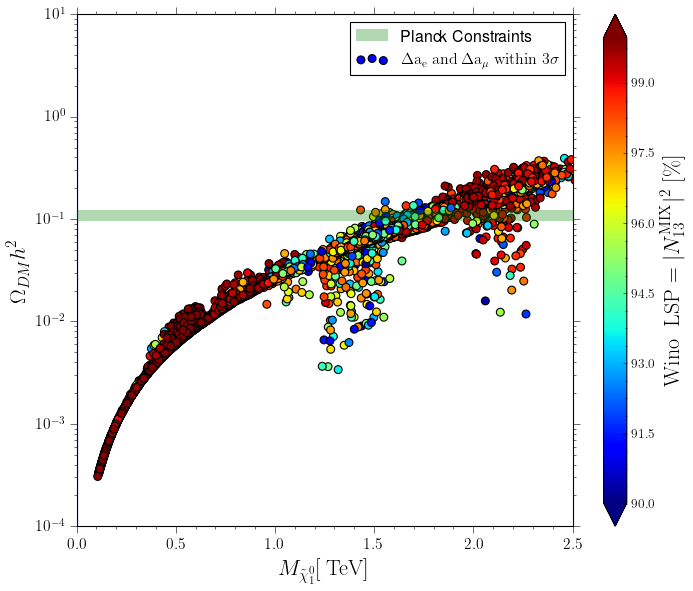

In [58]:
# BinoPrimeLike = np.array(df_sub_123sigma["NMIX11"])**2
# BinoLike      = np.array(df_sub_123sigma["NMIX12"])**2
# BinoMixing    = np.array(df_sub_123sigma["NMIX11"])**2 + np.array(df_sub_123sigma["NMIX12"])**2
# WinoLike      = np.array(df_sub_123sigma["NMIX13"])**2
# HiggsinoLike  = np.array(df_sub_123sigma["NMIX14"])**2 + np.array(df_sub_123sigma["NMIX15"])**2
# SLike         = np.array(df_sub_123sigma["NMIX16"])**2

################################################################

df_sub_123sigma_WinoLSP = df_sub_123sigma[  ((df_sub_123sigma["NMIX13"])**2 >= 0.9) ] # Exclude all solution Wino content less than 40%
WinoLike      = np.array(df_sub_123sigma_WinoLSP["NMIX13"])**2

################################################################


pyplot.rcParams['figure.figsize'] = (10.0, 8.0)
cm = plt.cm.get_cmap('jet')

fig, ax1 = plt.subplots()
fig.set_facecolor('white')

col = np.array(WinoLike)*100.

sc1 = ax1.scatter(np.array(df_sub_123sigma_WinoLSP["Chi1"])/1000., np.array(df_sub_123sigma_WinoLSP["RelicDensity"]), c=col, cmap=cm, marker='o', s=50, 
                  label=r"$ {\rm\ \Delta a_e\ and\ \Delta a_\mu\ within\ 3\sigma}$")

#cbar1 = plt.colorbar(sc1, format = "%.2f", extend="both")
cbar1 = plt.colorbar(sc1, extend='both')

ax1.axhspan(0.096,0.122,color='green',fill=True,alpha=.3,linewidth=0.0,zorder=80, label="Planck Constraints")

cbar1.set_label(r"$\displaystyle {\rm\ Wino\ \ LSP} = | N^{\rm MIX}_{13} |^2 {\rm\ [\%]}$", fontsize=20)
ax1 = plt.xlabel(r"$\displaystyle M_{\tilde{\chi}_1^0} [\rm\ TeV]$ ", fontsize=20)
ax1 = plt.ylabel(r"$\displaystyle \Omega_{DM} h^2 $", fontsize=20)

plt.axhline(y=0., color='b', linestyle='-')
plt.axvline(x=0., color='b', linestyle='-')

plt.xlim([0.,2.5])
plt.ylim([1e-4,1e1])

#plt.xscale('log')
plt.yscale('log')

#plt.text(1.9, 16.5, r"$\displaystyle \frac{M_{Z_R}}{M_{W_R}} = 6.01 $", fontsize=15, bbox=dict(facecolor='green', alpha=0.5))
plt.minorticks_on()
plt.tick_params(axis='both', which='both', labelsize=14, direction='in', top="on", right="on", length=6)
plt.tick_params(which='minor', length=3, color='k', direction='in', top="on", right="on")
# Set both ticks to be outside
plt.tick_params(which='both', direction='out')
plt.legend()
leg=plt.legend(loc='best',frameon=True)
leg.set_zorder(800)
fig.savefig('/Users/oozdal/Dropbox/MagMoment/Results/NeutralinoDM/WinoLSP.png')   # save the figure to file
#plt.close(fig)

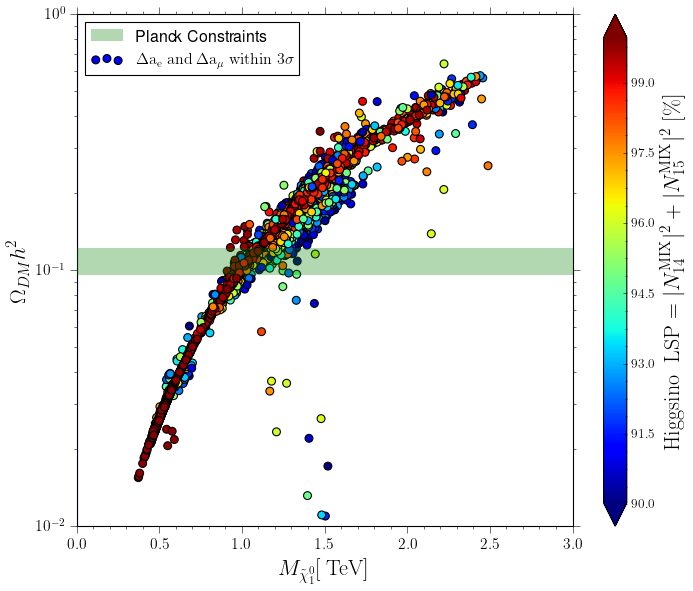

In [59]:
# BinoPrimeLike = np.array(df_sub_123sigma["NMIX11"])**2
# BinoLike      = np.array(df_sub_123sigma["NMIX12"])**2
# BinoMixing    = np.array(df_sub_123sigma["NMIX11"])**2 + np.array(df_sub_123sigma["NMIX12"])**2
# WinoLike      = np.array(df_sub_123sigma["NMIX13"])**2
# HiggsinoLike  = np.array(df_sub_123sigma["NMIX14"])**2 + np.array(df_sub_123sigma["NMIX15"])**2
# SLike         = np.array(df_sub_123sigma["NMIX16"])**2

################################################################

df_sub_123sigma_HiggsinoLSP = df_sub_123sigma[  ( ( df_sub_123sigma["NMIX14"])**2 + (df_sub_123sigma["NMIX15"])**2 >= 0.9 ) ] # Exclude all solution Higgsino content less than 40%
HiggsinoLike      = np.array(df_sub_123sigma_HiggsinoLSP["NMIX14"])**2 + np.array(df_sub_123sigma_HiggsinoLSP["NMIX15"])**2

################################################################


pyplot.rcParams['figure.figsize'] = (10.0, 8.0)
cm = plt.cm.get_cmap('jet')

fig, ax1 = plt.subplots()
fig.set_facecolor('white')

col = np.array(HiggsinoLike)*100.

sc1 = ax1.scatter(np.array(df_sub_123sigma_HiggsinoLSP["Chi1"])/1000., np.array(df_sub_123sigma_HiggsinoLSP["RelicDensity"]), c=col, cmap=cm, marker='o', s=50, 
                  label=r"$ {\rm\ \Delta a_e\ and\ \Delta a_\mu\ within\ 3\sigma}$")

#cbar1 = plt.colorbar(sc1, format = "%.2f", extend="both")
cbar1 = plt.colorbar(sc1, extend='both')

ax1.axhspan(0.096,0.122,color='green',fill=True,alpha=.3,linewidth=0.0,zorder=80, label="Planck Constraints")

cbar1.set_label(r"$\displaystyle {\rm\ Higgsino\ \ LSP} = | N^{\rm MIX}_{14} |^2 + | N^{\rm MIX}_{15} |^2 {\rm\ [\%]}$", fontsize=20)
ax1 = plt.xlabel(r"$\displaystyle M_{\tilde{\chi}_1^0} [\rm\ TeV]$ ", fontsize=20)
ax1 = plt.ylabel(r"$\displaystyle \Omega_{DM} h^2 $", fontsize=20)

plt.axhline(y=0., color='b', linestyle='-')
plt.axvline(x=0., color='b', linestyle='-')

plt.xlim([0.,3.0])
plt.ylim([1e-2,1e0])

#plt.xscale('log')
plt.yscale('log')

#plt.text(1.9, 16.5, r"$\displaystyle \frac{M_{Z_R}}{M_{W_R}} = 6.01 $", fontsize=15, bbox=dict(facecolor='green', alpha=0.5))
plt.minorticks_on()
plt.tick_params(axis='both', which='both', labelsize=14, direction='in', top="on", right="on", length=6)
plt.tick_params(which='minor', length=3, color='k', direction='in', top="on", right="on")
# Set both ticks to be outside
plt.tick_params(which='both', direction='out')
plt.legend()
leg=plt.legend(loc='best',frameon=True)
leg.set_zorder(800)
fig.savefig('/Users/oozdal/Dropbox/MagMoment/Results/NeutralinoDM/HiggsinoLSP.png')   # save the figure to file
#plt.close(fig)

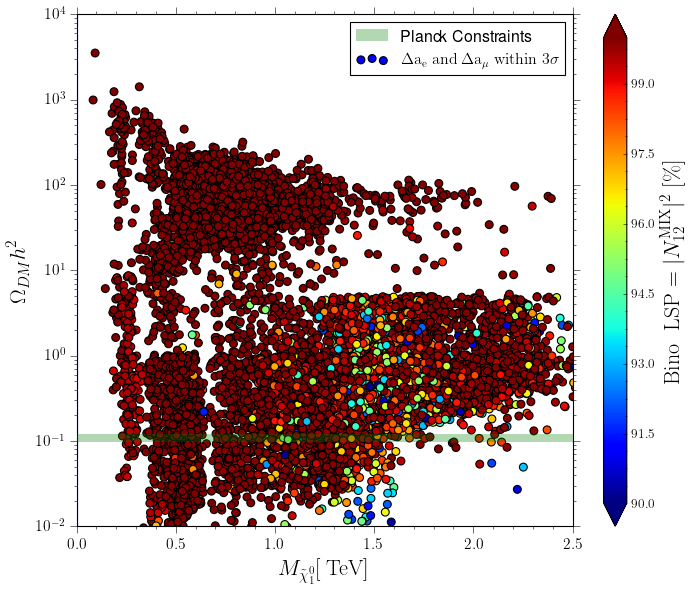

In [60]:
# BinoPrimeLike = np.array(df_sub_123sigma["NMIX11"])**2
# BinoLike      = np.array(df_sub_123sigma["NMIX12"])**2
# BinoMixing    = np.array(df_sub_123sigma["NMIX11"])**2 + np.array(df_sub_123sigma["NMIX12"])**2
# WinoLike      = np.array(df_sub_123sigma["NMIX13"])**2
# HiggsinoLike  = np.array(df_sub_123sigma["NMIX14"])**2 + np.array(df_sub_123sigma["NMIX15"])**2
# SLike         = np.array(df_sub_123sigma["NMIX16"])**2

################################################################

df_sub_123sigma_BinoLSP = df_sub_123sigma[  ( abs(df_sub_123sigma["NMIX12"])**2 >= 0.90 ) ] # Exclude all solution Higgsino content less than 40%
BinoLike      = np.array(abs(df_sub_123sigma_BinoLSP["NMIX12"]))**2

################################################################


pyplot.rcParams['figure.figsize'] = (10.0, 8.0)
cm = plt.cm.get_cmap('jet')

fig, ax1 = plt.subplots()
fig.set_facecolor('white')

col = np.array(BinoLike)*100.

sc1 = ax1.scatter(np.array(df_sub_123sigma_BinoLSP["Chi1"])/1000., np.array(df_sub_123sigma_BinoLSP["RelicDensity"]), c=col, cmap=cm, marker='o', s=50, 
                  label=r"$ {\rm\ \Delta a_e\ and\ \Delta a_\mu\ within\ 3\sigma}$")

#cbar1 = plt.colorbar(sc1, format = "%.2f", extend="both")
cbar1 = plt.colorbar(sc1, extend='both')

ax1.axhspan(0.096,0.122,color='green',fill=True,alpha=.3,linewidth=0.0,zorder=80, label="Planck Constraints")

cbar1.set_label(r"$\displaystyle {\rm\ Bino\ \ LSP} = | N^{\rm MIX}_{12} |^2 {\rm\ [\%]}$", fontsize=20)
ax1 = plt.xlabel(r"$\displaystyle M_{\tilde{\chi}_1^0} [\rm\ TeV]$ ", fontsize=20)
ax1 = plt.ylabel(r"$\displaystyle \Omega_{DM} h^2 $", fontsize=20)

plt.axhline(y=0., color='b', linestyle='-')
plt.axvline(x=0., color='b', linestyle='-')

plt.xlim([0.,2.5])
plt.ylim([1e-2,1e4])

#plt.xscale('log')
plt.yscale('log')

#plt.text(1.9, 16.5, r"$\displaystyle \frac{M_{Z_R}}{M_{W_R}} = 6.01 $", fontsize=15, bbox=dict(facecolor='green', alpha=0.5))
plt.minorticks_on()
plt.tick_params(axis='both', which='both', labelsize=14, direction='in', top="on", right="on", length=6)
plt.tick_params(which='minor', length=3, color='k', direction='in', top="on", right="on")
# Set both ticks to be outside
plt.tick_params(which='both', direction='out')
plt.legend()
leg=plt.legend(loc='best',frameon=True)
leg.set_zorder(800)
fig.savefig('/Users/oozdal/Dropbox/MagMoment/Results/NeutralinoDM/BinoLSP.png')   # save the figure to file
#plt.close(fig)

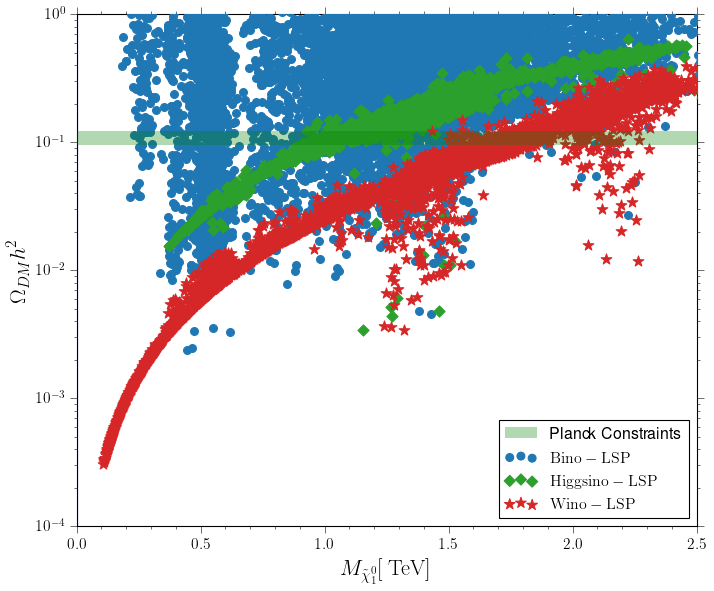

In [61]:
# BinoPrimeLike = np.array(df_sub_123sigma["NMIX11"])**2
# BinoLike      = np.array(df_sub_123sigma["NMIX12"])**2
# BinoMixing    = np.array(df_sub_123sigma["NMIX11"])**2 + np.array(df_sub_123sigma["NMIX12"])**2
# WinoLike      = np.array(df_sub_123sigma["NMIX13"])**2
# HiggsinoLike  = np.array(df_sub_123sigma["NMIX14"])**2 + np.array(df_sub_123sigma["NMIX15"])**2
# SLike         = np.array(df_sub_123sigma["NMIX16"])**2

################################################################

df_sub_123sigma_BinoLSP = df_sub_123sigma[  ( ( df_sub_123sigma["NMIX12"])**2 >= 0.9 ) ] # Exclude all solution Higgsino content less than 40%

# Exclude all solution Higgsino content less than 70%
df_sub_123sigma_HiggsinoLSP = df_sub_123sigma[  ( ( df_sub_123sigma["NMIX14"])**2 + (df_sub_123sigma["NMIX15"])**2 >= 0.9 ) ] 

df_sub_123sigma_WinoLSP = df_sub_123sigma[  ((df_sub_123sigma["NMIX13"])**2 >= 0.9) ] # Exclude all solution Wino content less than 70%

################################################################

pyplot.rcParams['figure.figsize'] = (10.0, 8.0)

fig, ax1 = plt.subplots()
fig.set_facecolor('white')

ax1.scatter(np.array(df_sub_123sigma_BinoLSP["Chi1"])/1000., np.array(df_sub_123sigma_BinoLSP["RelicDensity"]), color="tab:blue", marker='o', s=50, 
                  label=r"$ {\rm\ Bino-LSP}$", zorder = 10)

ax1.scatter(np.array(df_sub_123sigma_HiggsinoLSP["Chi1"])/1000., np.array(df_sub_123sigma_HiggsinoLSP["RelicDensity"]), color="tab:green", marker='D', s=50, 
                  label=r"$ {\rm\ Higgsino-LSP}$", zorder = 20)

ax1.scatter(np.array(df_sub_123sigma_WinoLSP["Chi1"])/1000., np.array(df_sub_123sigma_WinoLSP["RelicDensity"]), color="tab:red", marker='*', s=100, 
                  label=r"$ {\rm\ Wino-LSP}$", zorder = 30)


ax1.axhspan(0.096,0.122,color='green',fill=True,alpha=.3,linewidth=0.0,zorder=80, label="Planck Constraints")

ax1 = plt.xlabel(r"$\displaystyle M_{\tilde{\chi}_1^0} [\rm\ TeV]$ ", fontsize=20)
ax1 = plt.ylabel(r"$\displaystyle \Omega_{DM} h^2 $", fontsize=20)

plt.axhline(y=0., color='b', linestyle='-')
plt.axvline(x=0., color='b', linestyle='-')

plt.xlim([0.,2.5])
plt.ylim([1e-4,1e0])

#plt.xscale('log')
plt.yscale('log')

#plt.text(1.9, 16.5, r"$\displaystyle \frac{M_{Z_R}}{M_{W_R}} = 6.01 $", fontsize=15, bbox=dict(facecolor='green', alpha=0.5))
plt.minorticks_on()
plt.tick_params(axis='both', which='both', labelsize=14, direction='in', top="on", right="on", length=6)
plt.tick_params(which='minor', length=3, color='k', direction='in', top="on", right="on")
# Set both ticks to be outside
plt.tick_params(which='both', direction='out')
plt.legend()
leg=plt.legend(loc='lower right',frameon=True)
leg.set_zorder(800)
fig.savefig('/Users/oozdal/Dropbox/MagMoment/Results/NeutralinoDM/RDvsDMComposition.png')   # save the figure to file
#plt.close(fig)

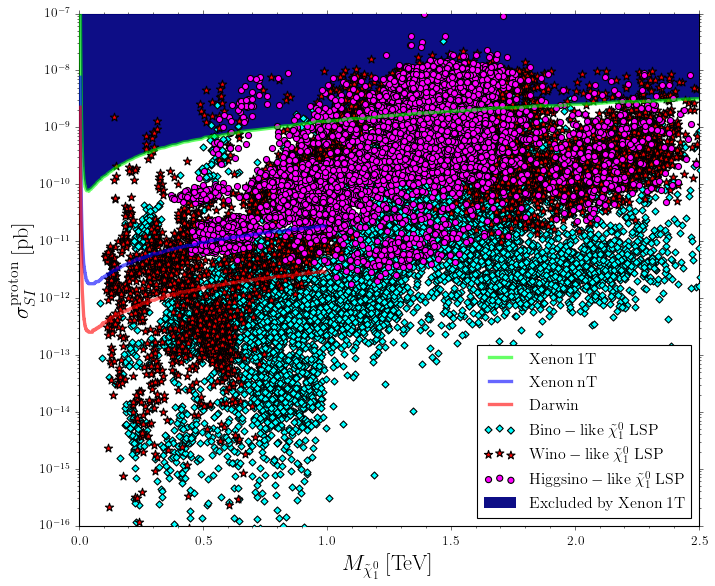

In [62]:
# Exclude all solution Higgsino content less than 70%
df_sub_123sigma_BinoLSP = df_sub_123sigma[  ( ( df_sub_123sigma["NMIX12"])**2 >= 0.7 ) ] 

# Exclude all solution Higgsino content less than 70%
df_sub_123sigma_HiggsinoLSP = df_sub_123sigma[  ( ( df_sub_123sigma["NMIX14"])**2 + (df_sub_123sigma["NMIX15"])**2 >= 0.7 ) ] 

# Exclude all solution Wino content less than 70%
df_sub_123sigma_WinoLSP = df_sub_123sigma[  ((df_sub_123sigma["NMIX13"])**2 >= 0.7) ] 

########################################################################################

pyplot.rcParams['figure.figsize'] = (10.0, 8.0)

fig, ax1 = plt.subplots()
fig.set_facecolor('white')

sc1 = ax1.plot(XENONWIMPMASS/1000., XENON1TXSECTION, c='lime', label=r"${\rm\ Xenon\ 1T} $",zorder=20, alpha=0.6, linewidth = '3.0')

sc1 = ax1.plot(XENONnTWIMPMASS/1000., XENONnTXSECTION, c='blue', label=r"${\rm\ Xenon\ nT} $",zorder=20, alpha=0.6, linewidth = '3.0')

sc1 = ax1.plot(DARWINWIMPMASS/1000., DARWINXSECTION, c='red', label=r"${\rm\ Darwin} $",zorder=20, alpha=0.6, linewidth = '3.0')

sc1 = ax1.scatter(np.array(df_sub_123sigma_BinoLSP["Chi1"])/1000., np.array(df_sub_123sigma_BinoLSP["SIproton"]), 
                   c='cyan', marker="D", zorder=10, label=r"$ {\rm\ Bino-like\ \tilde{\chi}_1^0\ LSP }$")

sc1 = ax1.scatter(np.array(abs(df_sub_123sigma_WinoLSP["Chi1"])/1000.), np.array(df_sub_123sigma_WinoLSP["SIproton"]), 
                  c='red', marker="*", zorder=11, s=60, label=r"$ {\rm\ Wino-like\ \tilde{\chi}_1^0\ LSP}$")

sc1 = ax1.scatter(np.array(abs(df_sub_123sigma_HiggsinoLSP["Chi1"])/1000.), np.array(df_sub_123sigma_HiggsinoLSP["SIproton"]), 
                  c='magenta', marker="o", zorder=12, s=30, label=r"$ {\rm\ Higgsino-like\ \tilde{\chi}_1^0\ LSP}$")

xmin = 0.0
xmax = 2.5
ymin = 1e-16
ymax = 1e-7
    
ax1.fill_between(XENONWIMPMASS/1000, XENON1TXSECTION, ymax, facecolor = 'navy', interpolate=True, alpha=.95,linewidth=0.0,
                 zorder=5, label=r"$\displaystyle {\rm\ Excluded\ by\ Xenon\ 1T} $")    
    
ax1.axis([xmin,xmax,ymin,ymax])
plt.xlabel(r"$\displaystyle M_{\tilde{\chi}_1^0} {\rm\ [TeV]}$", fontsize=20)
#plt.ylabel(r"$\displaystyle \sigma_{SI}^{\rm proton} \rm Min \left( 1, \frac{\Omega_{\rm DM}}{\Omega_{\rm Planck}}\right) {\rm\ [pb]}$", fontsize=20)
plt.ylabel(r"$\displaystyle \sigma_{SI}^{\rm proton} {\rm\ [pb]}$", fontsize=20)
    
#ax1.xaxis.set_major_locator(MultipleLocator(0.1))
#ax1.xaxis.set_minor_locator(MultipleLocator(0.025))
    
#ax1.yaxis.set_major_locator(MultipleLocator(5))
#ax1.yaxis.set_minor_locator(MultipleLocator(1))
    
plt.yscale('log')
    
# Set both ticks to be outside
ax1.tick_params(which='both', direction='out')
    
#plt.legend(loc='best',frameon=True)
leg = plt.legend(loc='lower right',frameon=True)
leg.set_zorder(100)

fig.savefig('/Users/oozdal/Dropbox/MagMoment/Results/NeutralinoDM/ProtonSIvsChi1.png')   # save the figure to file

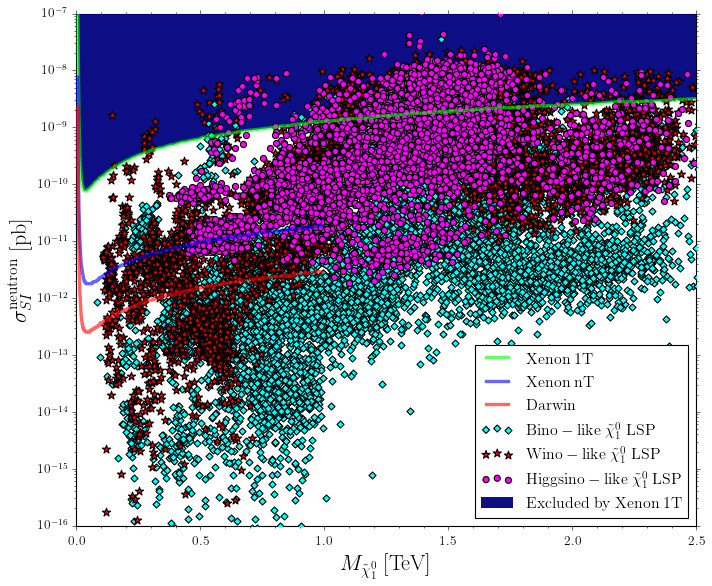

In [63]:
# Exclude all solution Higgsino content less than 70%
df_sub_123sigma_BinoLSP = df_sub_123sigma[  ( ( df_sub_123sigma["NMIX12"])**2 >= 0.7 ) ] 

# Exclude all solution Higgsino content less than 70%
df_sub_123sigma_HiggsinoLSP = df_sub_123sigma[  ( ( df_sub_123sigma["NMIX14"])**2 + (df_sub_123sigma["NMIX15"])**2 >= 0.7 ) ] 

# Exclude all solution Wino content less than 70%
df_sub_123sigma_WinoLSP = df_sub_123sigma[  ((df_sub_123sigma["NMIX13"])**2 >= 0.7) ] 

########################################################################################

pyplot.rcParams['figure.figsize'] = (10.0, 8.0)

fig, ax1 = plt.subplots()
fig.set_facecolor('white')

sc1 = ax1.plot(XENONWIMPMASS/1000., XENON1TXSECTION, c='lime', label=r"${\rm\ Xenon\ 1T} $",zorder=20, alpha=0.6, linewidth = '3.0')

sc1 = ax1.plot(XENONnTWIMPMASS/1000., XENONnTXSECTION, c='blue', label=r"${\rm\ Xenon\ nT} $",zorder=20, alpha=0.6, linewidth = '3.0')

sc1 = ax1.plot(DARWINWIMPMASS/1000., DARWINXSECTION, c='red', label=r"${\rm\ Darwin} $",zorder=20, alpha=0.6, linewidth = '3.0')


sc1 = ax1.scatter(np.array(df_sub_123sigma_BinoLSP["Chi1"])/1000., np.array(df_sub_123sigma_BinoLSP["SIneutron"]), 
                   c='cyan', marker="D", zorder=10, label=r"$ {\rm\ Bino-like\ \tilde{\chi}_1^0\ LSP}$")

sc1 = ax1.scatter(np.array(abs(df_sub_123sigma_WinoLSP["Chi1"])/1000.), np.array(df_sub_123sigma_WinoLSP["SIneutron"]), 
                  c='red', marker="*", zorder=11, s=60, label=r"$ {\rm\ Wino-like\ \tilde{\chi}_1^0\ LSP}$")

sc1 = ax1.scatter(np.array(abs(df_sub_123sigma_HiggsinoLSP["Chi1"])/1000.), np.array(df_sub_123sigma_HiggsinoLSP["SIneutron"]), 
                  c='magenta', marker="o", zorder=12, s=30, label=r"$ {\rm\ Higgsino-like\ \tilde{\chi}_1^0\ LSP}$")

xmin = 0.0
xmax = 2.5
ymin = 1e-16
ymax = 1e-7
    
ax1.fill_between(XENONWIMPMASS/1000, XENON1TXSECTION, ymax, facecolor = 'navy', interpolate=True, alpha=.95,linewidth=0.0,
                 zorder=5, label=r"$\displaystyle {\rm\ Excluded\ by\ Xenon\ 1T} $") 
    
ax1.axis([xmin,xmax,ymin,ymax])
plt.xlabel(r"$\displaystyle M_{\tilde{\chi}_1^0} {\rm\ [TeV]}$", fontsize=20)
#plt.ylabel(r"$\displaystyle \sigma_{SI}^{\rm proton} \rm Min \left( 1, \frac{\Omega_{\rm DM}}{\Omega_{\rm Planck}}\right) {\rm\ [pb]}$", fontsize=20)
plt.ylabel(r"$\displaystyle \sigma_{SI}^{\rm neutron} {\rm\ [pb]}$", fontsize=20)
    
#ax1.xaxis.set_major_locator(MultipleLocator(0.1))
#ax1.xaxis.set_minor_locator(MultipleLocator(0.025))
    
#ax1.yaxis.set_major_locator(MultipleLocator(5))
#ax1.yaxis.set_minor_locator(MultipleLocator(1))
    
plt.yscale('log')
    
# Set both ticks to be outside
ax1.tick_params(which='both', direction='out')
    
#plt.legend(loc='best',frameon=True)
leg = plt.legend(loc='lower right',frameon=True)
leg.set_zorder(100)

fig.savefig('/Users/oozdal/Dropbox/MagMoment/Results/NeutralinoDM/NeutronSIvsChi1.png')   # save the figure to file

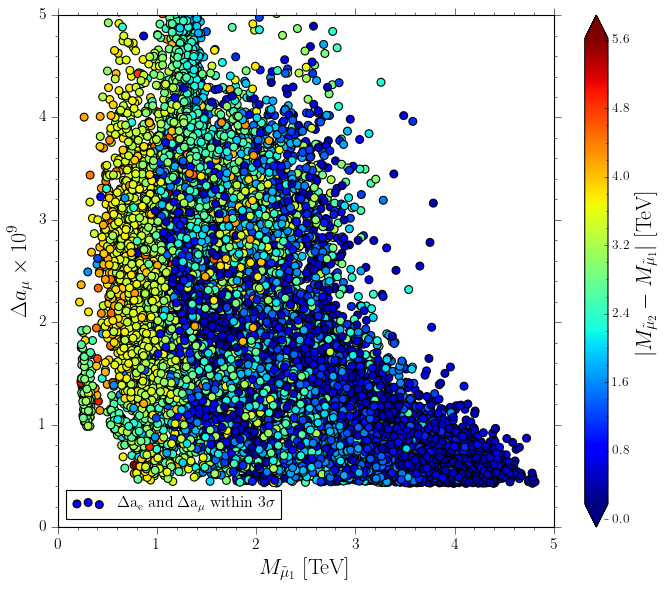

In [64]:
pyplot.rcParams['figure.figsize'] = (10.0, 8.0)
cm = plt.cm.get_cmap('jet')

fig, ax1 = plt.subplots()
fig.set_facecolor('white')

col = np.array(abs(df_sub_123sigma["Smuon2"]-df_sub_123sigma["Smuon1"]))/1000.

sc1 = ax1.scatter(np.array(df_sub_123sigma["Smuon1"])/1000., np.array(df_sub_123sigma["DAMU"])*10**9, c=col, cmap=cm, marker='o', s=50, 
                  label=r"$ {\rm\ \Delta a_e\ and\ \Delta a_\mu\ within\ 3\sigma}$")

#cbar1 = plt.colorbar(sc1, format = "%.2f", extend="both")
cbar1 = plt.colorbar(sc1, extend='both')


cbar1.set_label(r"$\displaystyle \vert M_{\tilde{\mu}_2} - M_{\tilde{\mu}_1} \vert {\rm\ [TeV]}$", fontsize=20)
ax1 = plt.xlabel(r"$\displaystyle M_{\tilde{\mu}_1} {\rm\ [TeV]}$ ", fontsize=20)
ax1 = plt.ylabel(r"$\displaystyle \Delta a_\mu \times 10^9 $ ", fontsize=20)

plt.axhline(y=0., color='b', linestyle='-')
plt.axvline(x=0., color='b', linestyle='-')

plt.xlim([0.,5.])
plt.ylim([0.,5.])

#plt.xscale('log')
#plt.yscale('log')

#plt.text(1.9, 16.5, r"$\displaystyle \frac{M_{Z_R}}{M_{W_R}} = 6.01 $", fontsize=15, bbox=dict(facecolor='green', alpha=0.5))
plt.minorticks_on()
plt.tick_params(axis='both', which='both', labelsize=14, direction='in', top="on", right="on", length=6)
plt.tick_params(which='minor', length=3, color='k', direction='in', top="on", right="on")
# Set both ticks to be outside
plt.tick_params(which='both', direction='out')
plt.legend()
leg=plt.legend(loc='best',frameon=True)
leg.set_zorder(800)
fig.savefig('/Users/oozdal/Dropbox/MagMoment/Results/NeutralinoDM/DAMUvsSmuons.png')   # save the figure to file
#plt.close(fig)

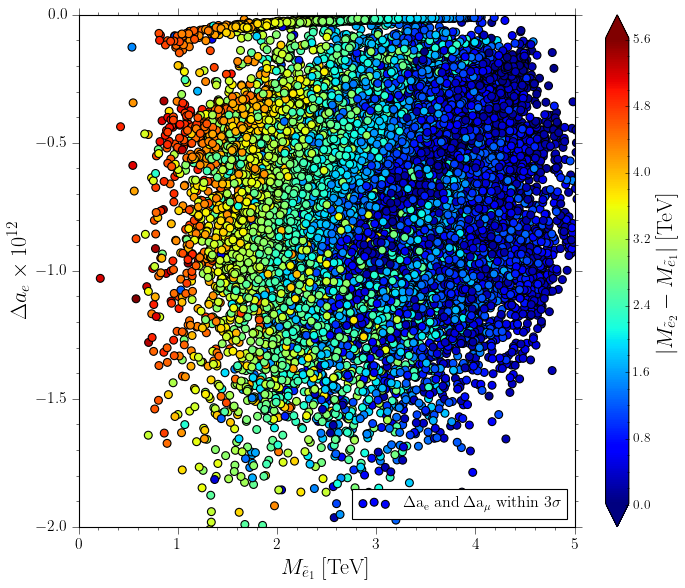

In [65]:
pyplot.rcParams['figure.figsize'] = (10.0, 8.0)
cm = plt.cm.get_cmap('jet')

fig, ax1 = plt.subplots()
fig.set_facecolor('white')

col = np.array(abs(df_sub_123sigma["Selectron2"]-df_sub_123sigma["Selectron1"]))/1000.

sc1 = ax1.scatter(np.array(df_sub_123sigma["Selectron1"])/1000., np.array(df_sub_123sigma["DAEL"])*10**12, c=col, cmap=cm, marker='o', s=50, 
                  label=r"$ {\rm\ \Delta a_e\ and\ \Delta a_\mu\ within\ 3\sigma}$")

#cbar1 = plt.colorbar(sc1, format = "%.2f", extend="both")
cbar1 = plt.colorbar(sc1, extend='both')


cbar1.set_label(r"$\displaystyle \vert M_{\tilde{e}_2} - M_{\tilde{e}_1} \vert {\rm\ [TeV]}$", fontsize=20)
ax1 = plt.xlabel(r"$\displaystyle M_{\tilde{e}_1} {\rm\ [TeV]}$ ", fontsize=20)
ax1 = plt.ylabel(r"$\displaystyle \Delta a_e \times 10^{12} $ ", fontsize=20)

#plt.axhline(y=0., color='b', linestyle='-')
#plt.axvline(x=0., color='b', linestyle='-')

plt.xlim([0.,5.])
plt.ylim([-2.,0.])

#plt.xscale('log')
#plt.yscale('log')

#plt.text(1.9, 16.5, r"$\displaystyle \frac{M_{Z_R}}{M_{W_R}} = 6.01 $", fontsize=15, bbox=dict(facecolor='green', alpha=0.5))
plt.minorticks_on()
plt.tick_params(axis='both', which='both', labelsize=14, direction='in', top="on", right="on", length=6)
plt.tick_params(which='minor', length=3, color='k', direction='in', top="on", right="on")
# Set both ticks to be outside
plt.tick_params(which='both', direction='out')
plt.legend()
leg=plt.legend(loc='best',frameon=True)
leg.set_zorder(800)
fig.savefig('/Users/oozdal/Dropbox/MagMoment/Results/NeutralinoDM/DAELvsSelectrons.png')   # save the figure to file
#plt.close(fig)

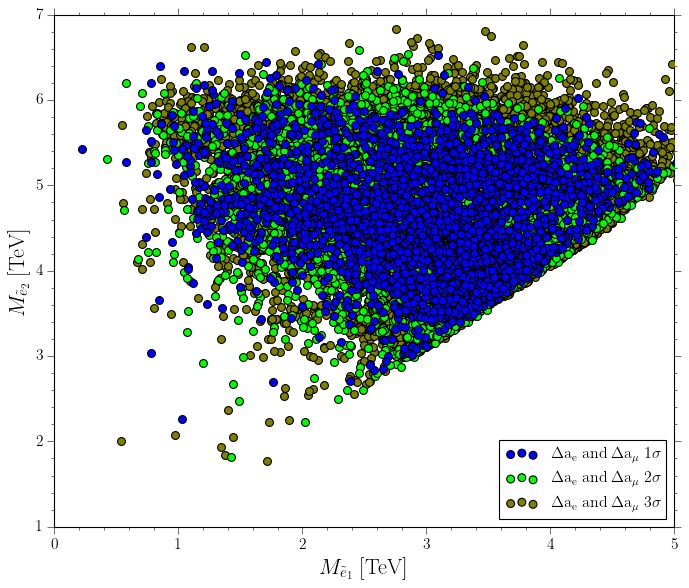

In [66]:
pyplot.rcParams['figure.figsize'] = (10.0, 8.0)
cm = plt.cm.get_cmap('jet')

fig, ax1 = plt.subplots()
fig.set_facecolor('white')

#col = np.array(df_sub_DA["Tep"])
sc1 = ax1.scatter(np.array(df_sub_1sigma["Selectron1"])/1000., np.array(df_sub_1sigma["Selectron2"])/1000., c='blue', marker='o', s=50, zorder=5,
                  label=r"$ {\rm\ \Delta a_e\ and\ \Delta a_\mu\ 1\sigma}$")
sc1 = ax1.scatter(np.array(df_sub_2sigma["Selectron1"])/1000., np.array(df_sub_2sigma["Selectron2"])/1000., c='lime', marker='o', s=50, zorder=4,
                  label=r"$ {\rm\ \Delta a_e\ and\ \Delta a_\mu\ 2\sigma}$")
sc1 = ax1.scatter(np.array(df_sub_3sigma["Selectron1"])/1000., np.array(df_sub_3sigma["Selectron2"])/1000., c='olive', marker='o', s=50, zorder=3,
                  label=r"$ {\rm\ \Delta a_e\ and\ \Delta a_\mu\ 3\sigma}$")

#cbar1 = plt.colorbar(sc1, format = "%.2f", extend="both")
#cbar1 = plt.colorbar(sc1, extend='both')

#sc1 = ax1.scatter(np.array(0)*10**12, np.array(0)*10**9, c="black", marker='o', s=100)

#sc1 = ax1.plot(np.array(G2_1sig["DAEL"]), np.array(G2_1sig["DAMU"]), c="red", label=r"$ {1 \sigma} $")
#sc1 = ax1.plot(np.array(G2_2sig["DAEL"]), np.array(G2_2sig["DAMU"]), c="brown", label=r"$ {2 \sigma} $")
#sc1 = ax1.plot(np.array(G2_3sig["DAEL"]), np.array(G2_3sig["DAMU"]), c="darkmagenta", label=r"$ {3 \sigma} $")

#cbar1.set_label(r"$\displaystyle T^\prime_e  {\rm\ [GeV]} $", fontsize=20)
ax1 = plt.xlabel(r"$\displaystyle M_{\tilde{e}_1} {\rm\ [TeV]}$ ", fontsize=20)
ax1 = plt.ylabel(r"$\displaystyle M_{\tilde{e}_2} {\rm\ [TeV]}$ ", fontsize=20)

#plt.axhline(y=0., color='b', linestyle='-')
#plt.axvline(x=0., color='b', linestyle='-')

plt.xlim([0.,5.])
plt.ylim([1.,7.])

#plt.xscale('log')
#plt.yscale('log')

#plt.text(0.07, -0.2, "SM", fontsize=15)
#plt.text(1.9, 16.5, r"$\displaystyle \frac{M_{Z_R}}{M_{W_R}} = 6.01 $", fontsize=15, bbox=dict(facecolor='green', alpha=0.5))
plt.minorticks_on()
plt.tick_params(axis='both', which='both', labelsize=14, direction='in', top="on", right="on", length=6)
plt.tick_params(which='minor', length=3, color='k', direction='in', top="on", right="on")
# Set both ticks to be outside
plt.tick_params(which='both', direction='out')
plt.legend()
leg=plt.legend(loc='lower right',frameon=True)
leg.set_zorder(800)
fig.savefig('/Users/oozdal/Dropbox/MagMoment/Results/NeutralinoDM/Selectron1vsSelectron2.png')   # save the figure to file
#plt.close(fig)

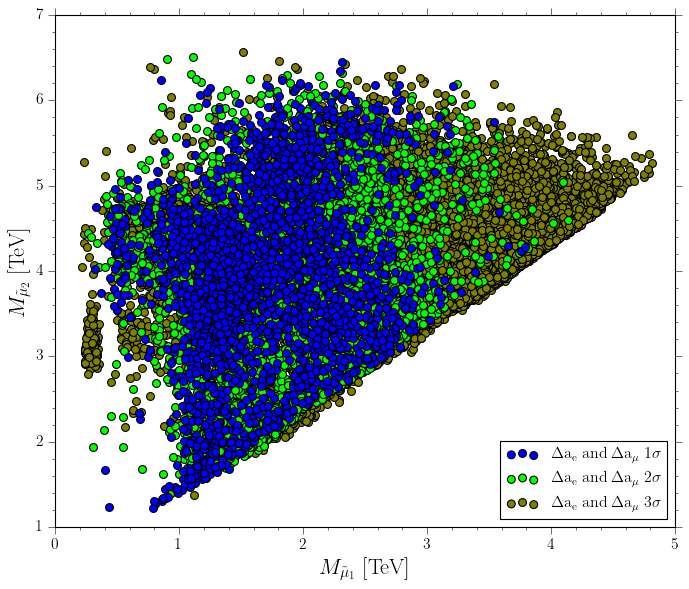

In [67]:
pyplot.rcParams['figure.figsize'] = (10.0, 8.0)
cm = plt.cm.get_cmap('jet')

fig, ax1 = plt.subplots()
fig.set_facecolor('white')

#col = np.array(df_sub_DA["Tep"])
sc1 = ax1.scatter(np.array(df_sub_1sigma["Smuon1"])/1000., np.array(df_sub_1sigma["Smuon2"])/1000., c='blue', marker='o', s=50, zorder=5,
                  label=r"$ {\rm\ \Delta a_e\ and\ \Delta a_\mu\ 1\sigma}$")
sc1 = ax1.scatter(np.array(df_sub_2sigma["Smuon1"])/1000., np.array(df_sub_2sigma["Smuon2"])/1000., c='lime', marker='o', s=50, zorder=4,
                  label=r"$ {\rm\ \Delta a_e\ and\ \Delta a_\mu\ 2\sigma}$")
sc1 = ax1.scatter(np.array(df_sub_3sigma["Smuon1"])/1000., np.array(df_sub_3sigma["Smuon2"])/1000., c='olive', marker='o', s=50, zorder=3,
                  label=r"$ {\rm\ \Delta a_e\ and\ \Delta a_\mu\ 3\sigma}$")

#cbar1 = plt.colorbar(sc1, format = "%.2f", extend="both")
#cbar1 = plt.colorbar(sc1, extend='both')

#sc1 = ax1.scatter(np.array(0)*10**12, np.array(0)*10**9, c="black", marker='o', s=100)

#sc1 = ax1.plot(np.array(G2_1sig["DAEL"]), np.array(G2_1sig["DAMU"]), c="red", label=r"$ {1 \sigma} $")
#sc1 = ax1.plot(np.array(G2_2sig["DAEL"]), np.array(G2_2sig["DAMU"]), c="brown", label=r"$ {2 \sigma} $")
#sc1 = ax1.plot(np.array(G2_3sig["DAEL"]), np.array(G2_3sig["DAMU"]), c="darkmagenta", label=r"$ {3 \sigma} $")

#cbar1.set_label(r"$\displaystyle T^\prime_e  {\rm\ [GeV]} $", fontsize=20)
ax1 = plt.xlabel(r"$\displaystyle M_{\tilde{\mu}_1} {\rm\ [TeV]}$ ", fontsize=20)
ax1 = plt.ylabel(r"$\displaystyle M_{\tilde{\mu}_2} {\rm\ [TeV]}$ ", fontsize=20)

#plt.axhline(y=0., color='b', linestyle='-')
#plt.axvline(x=0., color='b', linestyle='-')

plt.xlim([0.,5.])
plt.ylim([1.,7.])

#plt.xscale('log')
#plt.yscale('log')

#plt.text(0.07, -0.2, "SM", fontsize=15)
#plt.text(1.9, 16.5, r"$\displaystyle \frac{M_{Z_R}}{M_{W_R}} = 6.01 $", fontsize=15, bbox=dict(facecolor='green', alpha=0.5))
plt.minorticks_on()
plt.tick_params(axis='both', which='both', labelsize=14, direction='in', top="on", right="on", length=6)
plt.tick_params(which='minor', length=3, color='k', direction='in', top="on", right="on")
# Set both ticks to be outside
plt.tick_params(which='both', direction='out')
plt.legend()
leg=plt.legend(loc='lower right',frameon=True)
leg.set_zorder(800)
fig.savefig('/Users/oozdal/Dropbox/MagMoment/Results/NeutralinoDM/Smuon1vsSmuon2.png')   # save the figure to file
#plt.close(fig)

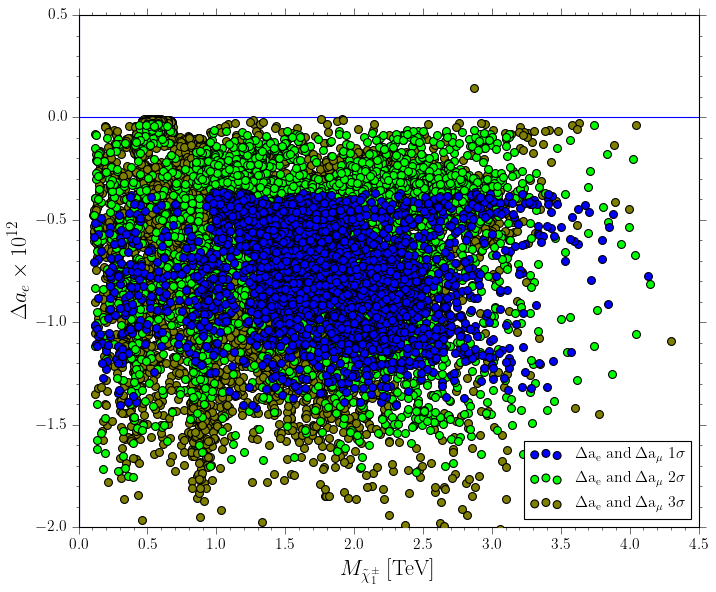

In [68]:
pyplot.rcParams['figure.figsize'] = (10.0, 8.0)
cm = plt.cm.get_cmap('jet')

fig, ax1 = plt.subplots()
fig.set_facecolor('white')

sc1 = ax1.scatter(np.array(df_sub_1sigma["Cha1"])/1000., np.array(df_sub_1sigma["DAEL"])*10**12, c='blue', marker='o', s=50, zorder=5,
                  label=r"$ {\rm\ \Delta a_e\ and\ \Delta a_\mu\ 1\sigma}$")
sc1 = ax1.scatter(np.array(df_sub_2sigma["Cha1"])/1000., np.array(df_sub_2sigma["DAEL"])*10**12, c='lime', marker='o', s=50, zorder=4,
                  label=r"$ {\rm\ \Delta a_e\ and\ \Delta a_\mu\ 2\sigma}$")
sc1 = ax1.scatter(np.array(df_sub_3sigma["Cha1"])/1000., np.array(df_sub_3sigma["DAEL"])*10**12, c='olive', marker='o', s=50, zorder=3,
                  label=r"$ {\rm\ \Delta a_e\ and\ \Delta a_\mu\ 3\sigma}$")


#cbar1.set_label(r"$\displaystyle \vert M_{\tilde{\mu}_2} - M_{\tilde{\mu}_1} \vert {\rm\ [TeV]}$", fontsize=20)
ax1 = plt.xlabel(r"$\displaystyle M_{\tilde{\chi}_1^\pm} {\rm\ [TeV]}$ ", fontsize=20)
ax1 = plt.ylabel(r"$\displaystyle \Delta a_e \times 10^{12} $ ", fontsize=20)

plt.axhline(y=0., color='b', linestyle='-')
plt.axvline(x=0., color='b', linestyle='-')

plt.xlim([0., 4.5])
plt.ylim([-2., 0.5])

#plt.xscale('log')
#plt.yscale('log')

#plt.text(1.9, 16.5, r"$\displaystyle \frac{M_{Z_R}}{M_{W_R}} = 6.01 $", fontsize=15, bbox=dict(facecolor='green', alpha=0.5))
plt.minorticks_on()
plt.tick_params(axis='both', which='both', labelsize=14, direction='in', top="on", right="on", length=6)
plt.tick_params(which='minor', length=3, color='k', direction='in', top="on", right="on")
# Set both ticks to be outside
plt.tick_params(which='both', direction='out')
plt.legend()
leg=plt.legend(loc='lower right',frameon=True)
leg.set_zorder(800)
fig.savefig('/Users/oozdal/Dropbox/MagMoment/Results/NeutralinoDM/DAELvsCha1.png')   # save the figure to file
#plt.close(fig)

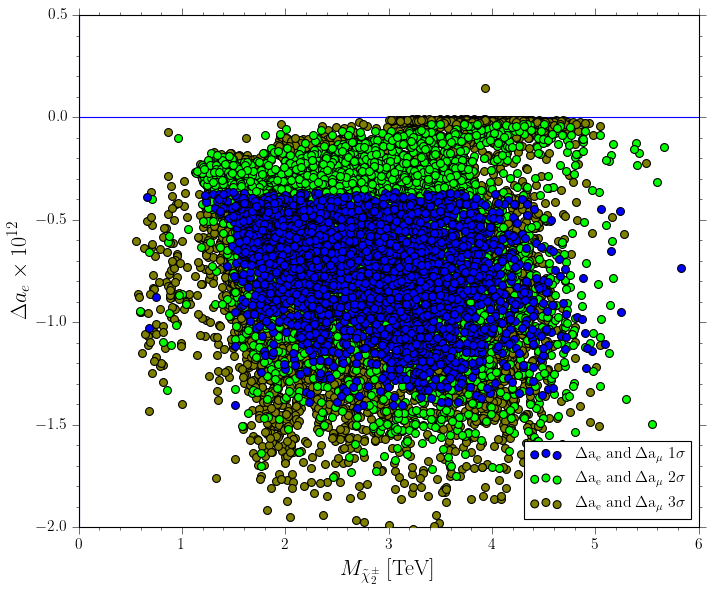

In [69]:
pyplot.rcParams['figure.figsize'] = (10.0, 8.0)
cm = plt.cm.get_cmap('jet')

fig, ax1 = plt.subplots()
fig.set_facecolor('white')

sc1 = ax1.scatter(np.array(df_sub_1sigma["Cha2"])/1000., np.array(df_sub_1sigma["DAEL"])*10**12, c='blue', marker='o', s=50, zorder=5,
                  label=r"$ {\rm\ \Delta a_e\ and\ \Delta a_\mu\ 1\sigma}$")
sc1 = ax1.scatter(np.array(df_sub_2sigma["Cha2"])/1000., np.array(df_sub_2sigma["DAEL"])*10**12, c='lime', marker='o', s=50, zorder=4,
                  label=r"$ {\rm\ \Delta a_e\ and\ \Delta a_\mu\ 2\sigma}$")
sc1 = ax1.scatter(np.array(df_sub_3sigma["Cha2"])/1000., np.array(df_sub_3sigma["DAEL"])*10**12, c='olive', marker='o', s=50, zorder=3,
                  label=r"$ {\rm\ \Delta a_e\ and\ \Delta a_\mu\ 3\sigma}$")


#cbar1.set_label(r"$\displaystyle \vert M_{\tilde{\mu}_2} - M_{\tilde{\mu}_1} \vert {\rm\ [TeV]}$", fontsize=20)
ax1 = plt.xlabel(r"$\displaystyle M_{\tilde{\chi}_2^\pm} {\rm\ [TeV]}$ ", fontsize=20)
ax1 = plt.ylabel(r"$\displaystyle \Delta a_e \times 10^{12} $ ", fontsize=20)

plt.axhline(y=0., color='b', linestyle='-')
plt.axvline(x=0., color='b', linestyle='-')

plt.xlim([0., 6.])
plt.ylim([-2., 0.5])

#plt.xscale('log')
#plt.yscale('log')

#plt.text(1.9, 16.5, r"$\displaystyle \frac{M_{Z_R}}{M_{W_R}} = 6.01 $", fontsize=15, bbox=dict(facecolor='green', alpha=0.5))
plt.minorticks_on()
plt.tick_params(axis='both', which='both', labelsize=14, direction='in', top="on", right="on", length=6)
plt.tick_params(which='minor', length=3, color='k', direction='in', top="on", right="on")
# Set both ticks to be outside
plt.tick_params(which='both', direction='out')
plt.legend()
leg=plt.legend(loc='lower right',frameon=True)
leg.set_zorder(800)
fig.savefig('/Users/oozdal/Dropbox/MagMoment/Results/NeutralinoDM/DAELvsCha2.png')   # save the figure to file
#plt.close(fig)

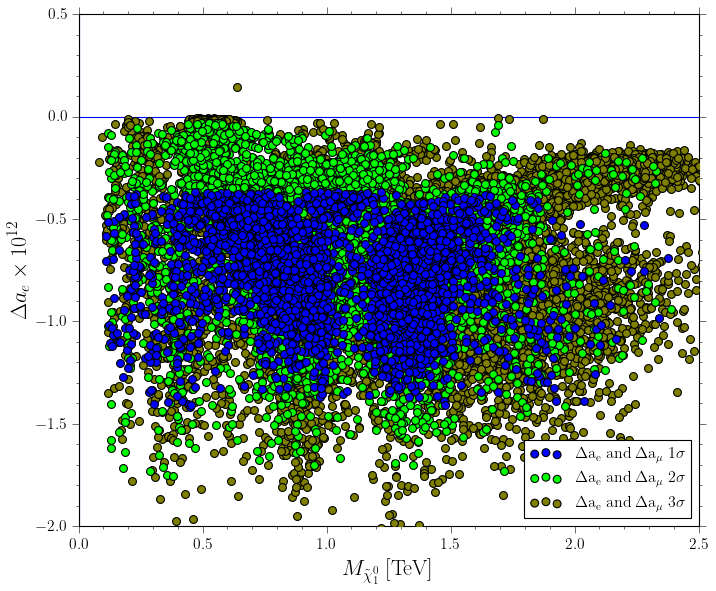

In [70]:
pyplot.rcParams['figure.figsize'] = (10.0, 8.0)
cm = plt.cm.get_cmap('jet')

fig, ax1 = plt.subplots()
fig.set_facecolor('white')

sc1 = ax1.scatter(np.array(df_sub_1sigma["Chi1"])/1000., np.array(df_sub_1sigma["DAEL"])*10**12, c='blue', marker='o', s=50, zorder=5,
                  label=r"$ {\rm\ \Delta a_e\ and\ \Delta a_\mu\ 1\sigma}$")
sc1 = ax1.scatter(np.array(df_sub_2sigma["Chi1"])/1000., np.array(df_sub_2sigma["DAEL"])*10**12, c='lime', marker='o', s=50, zorder=4,
                  label=r"$ {\rm\ \Delta a_e\ and\ \Delta a_\mu\ 2\sigma}$")
sc1 = ax1.scatter(np.array(df_sub_3sigma["Chi1"])/1000., np.array(df_sub_3sigma["DAEL"])*10**12, c='olive', marker='o', s=50, zorder=3,
                  label=r"$ {\rm\ \Delta a_e\ and\ \Delta a_\mu\ 3\sigma}$")


ax1 = plt.xlabel(r"$\displaystyle M_{\tilde{\chi}_1^0} {\rm\ [TeV]}$ ", fontsize=20)
ax1 = plt.ylabel(r"$\displaystyle \Delta a_e \times 10^{12} $ ", fontsize=20)

plt.axhline(y=0., color='b', linestyle='-')
plt.axvline(x=0., color='b', linestyle='-')

plt.xlim([0., 2.5])
plt.ylim([-2., 0.5])

#plt.xscale('log')
#plt.yscale('log')

#plt.text(1.9, 16.5, r"$\displaystyle \frac{M_{Z_R}}{M_{W_R}} = 6.01 $", fontsize=15, bbox=dict(facecolor='green', alpha=0.5))
plt.minorticks_on()
plt.tick_params(axis='both', which='both', labelsize=14, direction='in', top="on", right="on", length=6)
plt.tick_params(which='minor', length=3, color='k', direction='in', top="on", right="on")
# Set both ticks to be outside
plt.tick_params(which='both', direction='out')
plt.legend()
leg=plt.legend(loc='lower right',frameon=True)
leg.set_zorder(800)
fig.savefig('/Users/oozdal/Dropbox/MagMoment/Results/NeutralinoDM/DAELvsChi1.png')   # save the figure to file
#plt.close(fig)

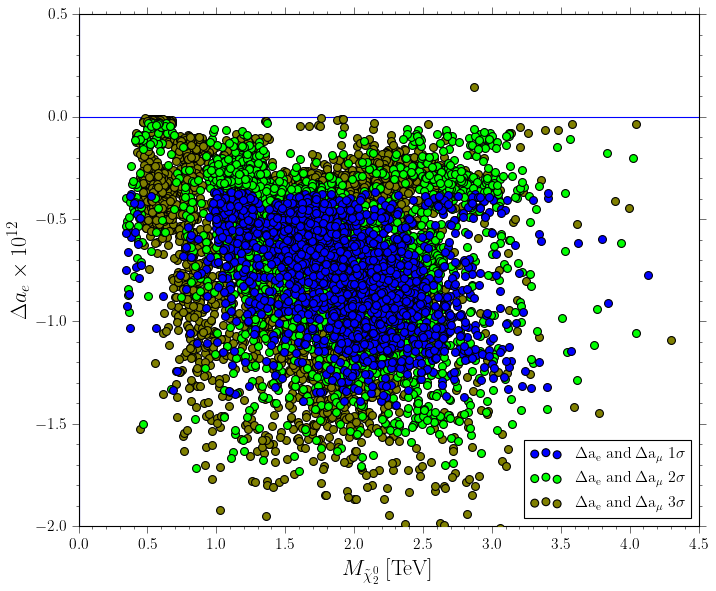

In [71]:
pyplot.rcParams['figure.figsize'] = (10.0, 8.0)
cm = plt.cm.get_cmap('jet')

fig, ax1 = plt.subplots()
fig.set_facecolor('white')

sc1 = ax1.scatter(np.array(df_sub_1sigma["Chi2"])/1000., np.array(df_sub_1sigma["DAEL"])*10**12, c='blue', marker='o', s=50, zorder=5,
                  label=r"$ {\rm\ \Delta a_e\ and\ \Delta a_\mu\ 1\sigma}$")
sc1 = ax1.scatter(np.array(df_sub_2sigma["Chi2"])/1000., np.array(df_sub_2sigma["DAEL"])*10**12, c='lime', marker='o', s=50, zorder=4,
                  label=r"$ {\rm\ \Delta a_e\ and\ \Delta a_\mu\ 2\sigma}$")
sc1 = ax1.scatter(np.array(df_sub_3sigma["Chi2"])/1000., np.array(df_sub_3sigma["DAEL"])*10**12, c='olive', marker='o', s=50, zorder=3,
                  label=r"$ {\rm\ \Delta a_e\ and\ \Delta a_\mu\ 3\sigma}$")


ax1 = plt.xlabel(r"$\displaystyle M_{\tilde{\chi}_2^0} {\rm\ [TeV]}$ ", fontsize=20)
ax1 = plt.ylabel(r"$\displaystyle \Delta a_e \times 10^{12} $ ", fontsize=20)

plt.axhline(y=0., color='b', linestyle='-')
plt.axvline(x=0., color='b', linestyle='-')

plt.xlim([0., 4.5])
plt.ylim([-2., 0.5])

#plt.xscale('log')
#plt.yscale('log')

#plt.text(1.9, 16.5, r"$\displaystyle \frac{M_{Z_R}}{M_{W_R}} = 6.01 $", fontsize=15, bbox=dict(facecolor='green', alpha=0.5))
plt.minorticks_on()
plt.tick_params(axis='both', which='both', labelsize=14, direction='in', top="on", right="on", length=6)
plt.tick_params(which='minor', length=3, color='k', direction='in', top="on", right="on")
# Set both ticks to be outside
plt.tick_params(which='both', direction='out')
plt.legend()
leg=plt.legend(loc='lower right',frameon=True)
leg.set_zorder(800)
fig.savefig('/Users/oozdal/Dropbox/MagMoment/Results/NeutralinoDM/DAELvsChi2.png')   # save the figure to file
#plt.close(fig)

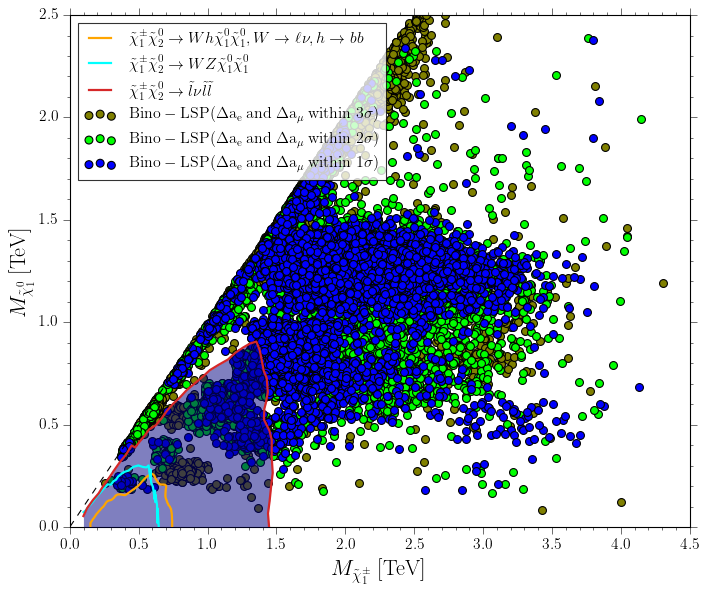

In [233]:
df_sub_123sigma_BinoLSP = df_sub_123sigma[  ( ( df_sub_123sigma["NMIX12"])**2 >= 0.9 ) ] # Exclude all solution Higgsino content less than 40%

df_sub_123sigma_BinoLSP_3sigma = df_sub_123sigma_BinoLSP[(df_sub_123sigma_BinoLSP['DAELDAMU_Sigma'] == "3sigma")]
df_sub_123sigma_BinoLSP_2sigma = df_sub_123sigma_BinoLSP[(df_sub_123sigma_BinoLSP['DAELDAMU_Sigma'] == "2sigma")]
df_sub_123sigma_BinoLSP_1sigma = df_sub_123sigma_BinoLSP[(df_sub_123sigma_BinoLSP['DAELDAMU_Sigma'] == "1sigma")]

#################################################################

pyplot.rcParams['figure.figsize'] = (10.0, 8.0)
cm = plt.cm.get_cmap('jet')

fig, ax1 = plt.subplots()
fig.set_facecolor('white')

#col = np.array(df_sub_DA["Tep"])

ax1.plot([-5, 5], [-5, 5], ls="--", c="black", zorder=50)

sc1 = ax1.scatter(np.array(df_sub_123sigma_BinoLSP_3sigma["Cha1"])/1000., np.array(abs(df_sub_123sigma_BinoLSP_3sigma["Chi1"]))/1000.,
                  c='olive', marker='o', s=50, zorder=1, 
                  label=r"$ {\rm\ Bino-LSP (\Delta a_e\ and\ \Delta a_\mu\ within\ 3\sigma)}$")
sc1 = ax1.scatter(np.array(df_sub_123sigma_BinoLSP_2sigma["Cha1"])/1000., np.array(abs(df_sub_123sigma_BinoLSP_2sigma["Chi1"]))/1000.,
                  c='lime', marker='o', s=50, zorder=2, 
                  label=r"$ {\rm\ Bino-LSP (\Delta a_e\ and\ \Delta a_\mu\ within\ 2\sigma)}$")
sc1 = ax1.scatter(np.array(df_sub_123sigma_BinoLSP_1sigma["Cha1"])/1000., np.array(abs(df_sub_123sigma_BinoLSP_1sigma["Chi1"]))/1000.,
                  c='blue', marker='o', s=50, zorder=3, 
                  label=r"$ {\rm\ Bino-LSP (\Delta a_e\ and\ \Delta a_\mu\ within\ 1\sigma)}$")

#cbar1 = plt.colorbar(sc1, format = "%.2f", extend="both")
#cbar1 = plt.colorbar(sc1, extend='both')

#sc1 = ax1.scatter(np.array(0)*10**12, np.array(0)*10**9, c="black", marker='o', s=100)

#sc1 = ax1.plot(np.array(G2_1sig["DAEL"]), np.array(G2_1sig["DAMU"]), c="red", label=r"$ {1 \sigma} $")
#sc1 = ax1.plot(np.array(G2_2sig["DAEL"]), np.array(G2_2sig["DAMU"]), c="brown", label=r"$ {2 \sigma} $")
#sc1 = ax1.plot(np.array(G2_3sig["DAEL"]), np.array(G2_3sig["DAMU"]), c="darkmagenta", label=r"$ {3 \sigma} $")

sc1 =  ax1.plot(observedATLAS_CharNeut_139fb_Cha1/1000., observedATLAS_CharNeut_139fb_Chi1/1000., c="orange", lw=2, zorder = 10, 
                label = r"$\displaystyle \tilde{\chi}_1^\pm \tilde{\chi}_2^0 \to Wh \tilde{\chi}_1^0 \tilde{\chi}_1^0, W \to \ell \nu, h \to bb $")

# ax1.fill_between(observedATLAS_CharNeut_139fb_Cha1/1000., observedATLAS_CharNeut_139fb_Chi1/1000., 0.0, facecolor = 'navy', interpolate=True, 
#                 alpha=.50,linewidth=0.0, zorder=5) 

sc1 =  ax1.plot(CharNeut_WZ_Mode_Cha1/1000., CharNeut_WZ_Mode_Chi1/1000., c="cyan", lw=2, zorder = 10, 
                label = r"$\displaystyle \tilde{\chi}_1^\pm \tilde{\chi}_2^0 \to WZ \tilde{\chi}_1^0 \tilde{\chi}_1^0 $")


sc1 =  ax1.plot(CharNeut_Slepton_Mode_Cha1/1000., CharNeut_Slepton_Mode_Chi1/1000., c="tab:red", lw=2, zorder = 10, 
                label = r"$\displaystyle \tilde{\chi}_1^\pm \tilde{\chi}_2^0 \to \tilde{l}\nu \tilde{l} \tilde{l} $")

ax1.fill_between(CharNeut_Slepton_Mode_Cha1/1000., CharNeut_Slepton_Mode_Chi1/1000., 0.0, facecolor = 'navy', interpolate=True, 
                 alpha=.50,linewidth=0.0, zorder=5) 


#cbar1.set_label(r"$\displaystyle T^\prime_e  {\rm\ [GeV]} $", fontsize=20)
ax1 = plt.xlabel(r"$\displaystyle M_{\tilde{\chi}_1^\pm} {\rm\ [TeV]}$", fontsize=20)
ax1 = plt.ylabel(r"$\displaystyle M_{\tilde{\chi}_1^0} {\rm\ [TeV]}$", fontsize=20)

#plt.axhline(y=0., color='b', linestyle='-')
#plt.axvline(x=0., color='b', linestyle='-')

plt.xlim([0., 4.5])
plt.ylim([0., 2.5])

#plt.xscale('log')
#plt.yscale('log')

#plt.axhline(y=1., color='black', linestyle='-')
#plt.axvline(x=1., color='black', linestyle='-')


#plt.text(0.07, -0.2, "SM", fontsize=15)
#plt.text(1.9, 16.5, r"$\displaystyle \frac{M_{Z_R}}{M_{W_R}} = 6.01 $", fontsize=15, bbox=dict(facecolor='green', alpha=0.5))
plt.minorticks_on()
plt.tick_params(axis='both', which='both', labelsize=14, direction='in', top="on", right="on", length=6)
plt.tick_params(which='minor', length=3, color='k', direction='in', top="on", right="on")
# Set both ticks to be outside
plt.tick_params(which='both', direction='out')
plt.legend()
leg=plt.legend(loc='upper left',frameon=True, framealpha=0.8)
leg.set_zorder(800)

fig.savefig('/Users/oozdal/Dropbox/MagMoment/Results/LeptonG2/Cha1vsChi1.png')   # save the figure to file
#plt.close(fig)

In [195]:
df_sub_123sigma_discretehh1_temp1 = df_sub_123sigma[   (( df_sub_123sigma["hh1"]) == 122.0 )  ]
df_sub_123sigma_discretehh1_temp2 = df_sub_123sigma[   (( df_sub_123sigma["hh1"]) == 122.5 )  ]
df_sub_123sigma_discretehh1_temp3 = df_sub_123sigma[   (( df_sub_123sigma["hh1"]) == 123.0 )  ]
df_sub_123sigma_discretehh1_temp4 = df_sub_123sigma[   (( df_sub_123sigma["hh1"]) == 123.5 )  ]
df_sub_123sigma_discretehh1_temp5 = df_sub_123sigma[   (( df_sub_123sigma["hh1"]) == 124.0 )  ]
df_sub_123sigma_discretehh1_temp6 = df_sub_123sigma[   (( df_sub_123sigma["hh1"]) == 124.1 )  ]
df_sub_123sigma_discretehh1_temp7 = df_sub_123sigma[   (( df_sub_123sigma["hh1"]) == 124.2 )  ]
df_sub_123sigma_discretehh1_temp8 = df_sub_123sigma[   (( df_sub_123sigma["hh1"]) == 124.3 )  ]
df_sub_123sigma_discretehh1_temp9 = df_sub_123sigma[   (( df_sub_123sigma["hh1"]) == 124.4 )  ]
df_sub_123sigma_discretehh1_temp10 = df_sub_123sigma[   (( df_sub_123sigma["hh1"]) == 124.5 )  ]
df_sub_123sigma_discretehh1_temp11 = df_sub_123sigma[   (( df_sub_123sigma["hh1"]) == 124.6 )  ]
df_sub_123sigma_discretehh1_temp12 = df_sub_123sigma[   (( df_sub_123sigma["hh1"]) == 124.7 )  ]
df_sub_123sigma_discretehh1_temp13 = df_sub_123sigma[   (( df_sub_123sigma["hh1"]) == 124.8 )  ]
df_sub_123sigma_discretehh1_temp14 = df_sub_123sigma[   (( df_sub_123sigma["hh1"]) == 124.9 )  ]
df_sub_123sigma_discretehh1_temp15 = df_sub_123sigma[   (( df_sub_123sigma["hh1"]) == 125.0 )  ]
df_sub_123sigma_discretehh1_temp16 = df_sub_123sigma[   (( df_sub_123sigma["hh1"]) == 125.09 )  ]
df_sub_123sigma_discretehh1_temp17 = df_sub_123sigma[   (( df_sub_123sigma["hh1"]) == 125.1 )  ]
df_sub_123sigma_discretehh1_temp18 = df_sub_123sigma[   (( df_sub_123sigma["hh1"]) == 125.2 )  ]
df_sub_123sigma_discretehh1_temp19 = df_sub_123sigma[   (( df_sub_123sigma["hh1"]) == 125.3 )  ]
df_sub_123sigma_discretehh1_temp20 = df_sub_123sigma[   (( df_sub_123sigma["hh1"]) == 125.4 )  ]
df_sub_123sigma_discretehh1_temp21 = df_sub_123sigma[   (( df_sub_123sigma["hh1"]) == 125.5 )  ]
df_sub_123sigma_discretehh1_temp22 = df_sub_123sigma[   (( df_sub_123sigma["hh1"]) == 125.6 )  ]
df_sub_123sigma_discretehh1_temp23 = df_sub_123sigma[   (( df_sub_123sigma["hh1"]) == 125.7 )  ]
df_sub_123sigma_discretehh1_temp24 = df_sub_123sigma[   (( df_sub_123sigma["hh1"]) == 125.8 )  ]
df_sub_123sigma_discretehh1_temp25 = df_sub_123sigma[   (( df_sub_123sigma["hh1"]) == 125.9 )  ]
df_sub_123sigma_discretehh1_temp26 = df_sub_123sigma[   (( df_sub_123sigma["hh1"]) == 126.0 )  ]
df_sub_123sigma_discretehh1_temp27 = df_sub_123sigma[   (( df_sub_123sigma["hh1"]) == 126.5 )  ]
df_sub_123sigma_discretehh1_temp28 = df_sub_123sigma[   (( df_sub_123sigma["hh1"]) == 127.0 )  ]
df_sub_123sigma_discretehh1_temp29 = df_sub_123sigma[   (( df_sub_123sigma["hh1"]) == 127.5 )  ]
df_sub_123sigma_discretehh1_temp30 = df_sub_123sigma[   (( df_sub_123sigma["hh1"]) == 128.0 )  ]

frames = [df_sub_123sigma_discretehh1_temp1, 
          df_sub_123sigma_discretehh1_temp2,
          df_sub_123sigma_discretehh1_temp3,
          df_sub_123sigma_discretehh1_temp4,
          df_sub_123sigma_discretehh1_temp5,          
          df_sub_123sigma_discretehh1_temp6,
          df_sub_123sigma_discretehh1_temp7,
          df_sub_123sigma_discretehh1_temp8,
          df_sub_123sigma_discretehh1_temp9,          
          df_sub_123sigma_discretehh1_temp10,          
          df_sub_123sigma_discretehh1_temp11,
          df_sub_123sigma_discretehh1_temp12,
          df_sub_123sigma_discretehh1_temp13,          
          df_sub_123sigma_discretehh1_temp14,
          df_sub_123sigma_discretehh1_temp15,
          df_sub_123sigma_discretehh1_temp16,
          df_sub_123sigma_discretehh1_temp17,
          df_sub_123sigma_discretehh1_temp18,
          df_sub_123sigma_discretehh1_temp19,
          df_sub_123sigma_discretehh1_temp20,
          df_sub_123sigma_discretehh1_temp21,
          df_sub_123sigma_discretehh1_temp22,
          df_sub_123sigma_discretehh1_temp23,
          df_sub_123sigma_discretehh1_temp24,
          df_sub_123sigma_discretehh1_temp25,
          df_sub_123sigma_discretehh1_temp26,
          df_sub_123sigma_discretehh1_temp27,
          df_sub_123sigma_discretehh1_temp28,
          df_sub_123sigma_discretehh1_temp29,
          df_sub_123sigma_discretehh1_temp30          
         ]

df_sub_123sigma_discretehh1 = pd.concat(frames)
df_sub_123sigma_discretehh1

DAEL          DAMU        vS    gpSUSY       MZp    Lambda  \
22676 -2.291887e-13  1.690664e-09  13262.42  0.469346  6227.731  0.160041   
3638  -3.292436e-13  8.122858e-10  13285.49  0.434061  5808.450  0.121655   
1483  -5.995076e-13  2.823842e-09  14562.02  0.487531  6098.774  0.153290   
1253  -5.342673e-13  6.429229e-10  14307.82  0.481422  5754.343  0.154664   
21987 -4.845120e-13  1.508854e-09  14505.47  0.433964  6331.329  0.249295   
28    -7.231193e-13  1.512161e-09  15650.69  0.471886  7420.831  0.390738   
9941  -3.356546e-13  1.291293e-09  15671.52  0.445591  7016.886  0.217905   
29708 -6.662756e-13  7.622609e-10  13575.02  0.464099  6310.552  0.180655   
9810  -3.183692e-13  2.699736e-09  14037.40  0.465810  6577.405  0.146521   
7947  -5.356381e-13  5.732120e-10  14946.60  0.480934  5995.136  0.174652   
23555 -6.001159e-13  7.922059e-10  14002.27  0.469731  6588.274  0.169622   
31409 -1.994627e-12  3.179246e-09  17490.08  0.481751  7031.976  0.212939   
1120  -5.462153e-13  1.219112e-09  15648.76  0.466169  7320.330  0.217729   
5469  -5.092532e-13  1.657926e-09  14486.71  0.473465  6224.992  0.251937   
11517 -5.467396e-13  4.073371e-09  15109.80  0.483186  6123.001  0.188360   
23443 -7.342093e-13  3.086184e-09  15732.71  0.507197  5636.652  0.328718   
32744 -3.476751e-13  2.590605e-09  12851.43  0.483833  5488.890  0.140266   
8394  -1.528864e-12  3.670314e-09  17776.80  0.481959  7152.622  0.225081   
11692 -6.661563e-13  2.030345e-09  14134.96  0.462552  5246.516  0.200580   
19677 -5.367908e-13  5.564697e-10  14281.18  0.481094  5735.210  0.170557   
12025 -6.731771e-13  4.663159e-10  13763.71  0.481941  5549.906  0.151275   
2279  -9.217224e-13  7.711070e-10  12682.89  0.457666  5851.513  0.111968   
29112 -8.148000e-13  1.161912e-09  14598.39  0.447583  6589.447  0.344856   
30958 -5.721368e-13  3.777098e-09  16986.27  0.468244  8039.018  0.175745   
21552 -4.697913e-13  1.055773e-09  14131.62  0.496527  5481.675  0.232713   
32575 -8.736316e-13  2.215052e-09  17414.29  0.481582  6996.286  0.214486   

          TLambda      TYe33        Tep       Tmup  ...      MVR022  \
22676   5095.4740 -168.37280 -1308.9460   6506.895  ...  23771220.0   
3638    8130.1550  534.92450  1376.3250  -6696.912  ...  27762020.0   
1483    -525.8040  -86.41928 -2483.8860   7738.640  ...    897594.5   
1253    -541.0068  -86.15494 -2146.5520   7507.047  ...   1378202.0   
21987   6075.2920 -556.34260 -2335.2500  10205.200  ...  17636550.0   
28      6439.6040 -270.93370 -2760.6880   7799.522  ...  15404800.0   
9941   11733.2500 -100.17520  -860.3125   9849.404  ...   1073574.0   
29708   -426.2502 -128.65470 -2319.9860   8239.850  ...   1415296.0   
9810   -1249.9840  -55.87164 -1367.5160   3681.053  ...  22641840.0   
7947    -421.3977 -114.82840 -2254.6660   7372.859  ...   1793277.0   
23555   -493.8065 -118.42790 -2180.4380   7784.760  ...   1404073.0   
31409   2722.9580 -179.57290 -4515.5510   5464.776  ...   2163325.0   
1120    5697.5900 -461.90130 -2562.8980   8592.752  ...  16104060.0   
5469    2365.7070  201.29260  2817.5880  -4087.662  ...   9263667.0   
11517   3812.4920 -225.85820 -4416.5950   6381.323  ...  10576840.0   
23443   -529.4962  164.81030 -5033.0710   6163.862  ...  20182860.0   
32744  -1330.8140  -96.55050 -1603.7030   3726.040  ...  23536050.0   
8394    3617.9660 -147.47740 -4075.5850   5940.998  ...   1662611.0   
11692   9780.8790  -44.87001  3993.8390  -2989.010  ...  20122480.0   
19677   -447.4642 -119.06790 -1981.5380   6532.121  ...   1535902.0   
12025   -452.6939 -138.03380 -2074.9430   7834.186  ...   1370333.0   
2279    1786.7590   59.28441  5240.9780  -5182.047  ...  15834710.0   
29112  10482.9200   57.69692  2923.5280  -7695.428  ...  21891840.0   
30958   4211.9780 -167.33470 -5585.6050   5201.367  ...  11395890.0   
21552   5246.6500 -426.38140 -2320.2370   8764.843  ...  15684260.0   
32575   2934.7030 -180.43830 -3253.6770   5021.467  ...   2076161.0   

           MVR032

In [196]:
htomumu_exp = pd.read_csv('/Users/oozdal/projects/MagMoment/Scan/Htomumu/Htomumu.csv', header=None, sep=",", engine="python")
htomumu_exp.columns = ["Exp_hh1", "hhtomumu_SM"]
htomumu_exp

Exp_hh1  hhtomumu_SM
0    122.00     0.000233
1    122.50     0.000231
2    123.00     0.000228
3    123.50     0.000226
4    124.00     0.000223
5    124.10     0.000222
6    124.20     0.000222
7    124.30     0.000221
8    124.40     0.000221
9    124.50     0.000220
10   124.60     0.000220
11   124.70     0.000219
12   124.80     0.000219
13   124.90     0.000218
14   125.00     0.000218
15   125.09     0.000217
16   125.10     0.000217
17   125.20     0.000217
18   125.30     0.000216
19   125.40     0.000215
20   125.50     0.000215
21   125.60     0.000214
22   125.70     0.000214
23   125.80     0.000213
24   125.90     0.000212
25   126.00     0.000212
26   126.50     0.000209
27   127.00     0.000206
28   127.50     0.000203
29   128.00     0.000200

In [197]:
def Closest(list, Number):
    aux = []
    for valor in list:
        aux.append(abs(Number-valor))
    return aux.index(min(aux))

In [198]:
hhtomumu_SM = []
for i in df_sub_123sigma_discretehh1.index:
    hhtomumu_SM.append(htomumu_exp["hhtomumu_SM"][Closest(htomumu_exp["Exp_hh1"], df_sub_123sigma_discretehh1["hh1"][i] )])
hhtomumu_SM

[0.0002307,
 0.00022559999999999998,
 0.000223,
 0.0002224,
 0.00022189999999999997,
 0.0002214,
 0.00022080000000000003,
 0.00022080000000000003,
 0.00021919999999999996,
 0.00021810000000000002,
 0.00021810000000000002,
 0.00021810000000000002,
 0.0002176,
 0.0002176,
 0.0002176,
 0.0002165,
 0.0002165,
 0.0002153,
 0.00021480000000000002,
 0.0002137,
 0.00021309999999999998,
 0.00021190000000000003,
 0.00021190000000000003,
 0.00021190000000000003,
 0.0002061,
 0.0002032]

In [199]:
df_sub_123sigma_discretehh1["hhtomumu_SM"] = hhtomumu_SM
df_sub_123sigma_discretehh1

DAEL          DAMU        vS    gpSUSY       MZp    Lambda  \
22676 -2.291887e-13  1.690664e-09  13262.42  0.469346  6227.731  0.160041   
3638  -3.292436e-13  8.122858e-10  13285.49  0.434061  5808.450  0.121655   
1483  -5.995076e-13  2.823842e-09  14562.02  0.487531  6098.774  0.153290   
1253  -5.342673e-13  6.429229e-10  14307.82  0.481422  5754.343  0.154664   
21987 -4.845120e-13  1.508854e-09  14505.47  0.433964  6331.329  0.249295   
28    -7.231193e-13  1.512161e-09  15650.69  0.471886  7420.831  0.390738   
9941  -3.356546e-13  1.291293e-09  15671.52  0.445591  7016.886  0.217905   
29708 -6.662756e-13  7.622609e-10  13575.02  0.464099  6310.552  0.180655   
9810  -3.183692e-13  2.699736e-09  14037.40  0.465810  6577.405  0.146521   
7947  -5.356381e-13  5.732120e-10  14946.60  0.480934  5995.136  0.174652   
23555 -6.001159e-13  7.922059e-10  14002.27  0.469731  6588.274  0.169622   
31409 -1.994627e-12  3.179246e-09  17490.08  0.481751  7031.976  0.212939   
1120  -5.462153e-13  1.219112e-09  15648.76  0.466169  7320.330  0.217729   
5469  -5.092532e-13  1.657926e-09  14486.71  0.473465  6224.992  0.251937   
11517 -5.467396e-13  4.073371e-09  15109.80  0.483186  6123.001  0.188360   
23443 -7.342093e-13  3.086184e-09  15732.71  0.507197  5636.652  0.328718   
32744 -3.476751e-13  2.590605e-09  12851.43  0.483833  5488.890  0.140266   
8394  -1.528864e-12  3.670314e-09  17776.80  0.481959  7152.622  0.225081   
11692 -6.661563e-13  2.030345e-09  14134.96  0.462552  5246.516  0.200580   
19677 -5.367908e-13  5.564697e-10  14281.18  0.481094  5735.210  0.170557   
12025 -6.731771e-13  4.663159e-10  13763.71  0.481941  5549.906  0.151275   
2279  -9.217224e-13  7.711070e-10  12682.89  0.457666  5851.513  0.111968   
29112 -8.148000e-13  1.161912e-09  14598.39  0.447583  6589.447  0.344856   
30958 -5.721368e-13  3.777098e-09  16986.27  0.468244  8039.018  0.175745   
21552 -4.697913e-13  1.055773e-09  14131.62  0.496527  5481.675  0.232713   
32575 -8.736316e-13  2.215052e-09  17414.29  0.481582  6996.286  0.214486   

          TLambda      TYe33        Tep       Tmup  ...      MVR032  \
22676   5095.4740 -168.37280 -1308.9460   6506.895  ...  19804510.0   
3638    8130.1550  534.92450  1376.3250  -6696.912  ...   1281521.0   
1483    -525.8040  -86.41928 -2483.8860   7738.640  ...  18617850.0   
1253    -541.0068  -86.15494 -2146.5520   7507.047  ...  24284660.0   
21987   6075.2920 -556.34260 -2335.2500  10205.200  ...  17209090.0   
28      6439.6040 -270.93370 -2760.6880   7799.522  ...  22653860.0   
9941   11733.2500 -100.17520  -860.3125   9849.404  ...   7264914.0   
29708   -426.2502 -128.65470 -2319.9860   8239.850  ...  27044790.0   
9810   -1249.9840  -55.87164 -1367.5160   3681.053  ...   4634465.0   
7947    -421.3977 -114.82840 -2254.6660   7372.859  ...  20235180.0   
23555   -493.8065 -118.42790 -2180.4380   7784.760  ...  26098970.0   
31409   2722.9580 -179.57290 -4515.5510   5464.776  ...  20199910.0   
1120    5697.5900 -461.90130 -2562.8980   8592.752  ...  14286440.0   
5469    2365.7070  201.29260  2817.5880  -4087.662  ...   1903309.0   
11517   3812.4920 -225.85820 -4416.5950   6381.323  ...  20096120.0   
23443   -529.4962  164.81030 -5033.0710   6163.862  ...  25662150.0   
32744  -1330.8140  -96.55050 -1603.7030   3726.040  ...   3430242.0   
8394    3617.9660 -147.47740 -4075.5850   5940.998  ...  25448570.0   
11692   9780.8790  -44.87001  3993.8390  -2989.010  ...  24695760.0   
19677   -447.4642 -119.06790 -1981.5380   6532.121  ...  25169510.0   
12025   -452.6939 -138.03380 -2074.9430   7834.186  ...  27755190.0   
2279    1786.7590   59.28441  5240.9780  -5182.047  ...  23331580.0   
29112  10482.9200   57.69692  2923.5280  -7695.428  ...   9932498.0   
30958   4211.9780 -167.33470 -5585.6050   5201.367  ...  22571080.0   
21552   5246.6500 -426.38140 -2320.2370   8764.843  ...  16575760.0   
32575   2934.7030 -180.43830 -3253.6770   5021.467  ...  19653020.0   

            Chi2 

In [200]:
df_sub_123sigma_discretehh1["hh1tomumu"]/df_sub_123sigma_discretehh1["hhtomumu_SM"]

22676    1.548534
3638     1.570996
1483     1.473151
1253     1.468540
21987    1.580721
28       1.527332
9941     1.553979
29708    1.462593
9810     1.491247
7947     1.449260
23555    1.451989
31409    1.456250
1120     1.524585
5469     1.491691
11517    1.472706
23443    1.523074
32744    1.472219
8394     1.448985
11692    1.451479
19677    1.430693
12025    1.428734
2279     1.454249
29112    1.500799
30958    1.456035
21552    1.499508
32575    1.388590
dtype: float64

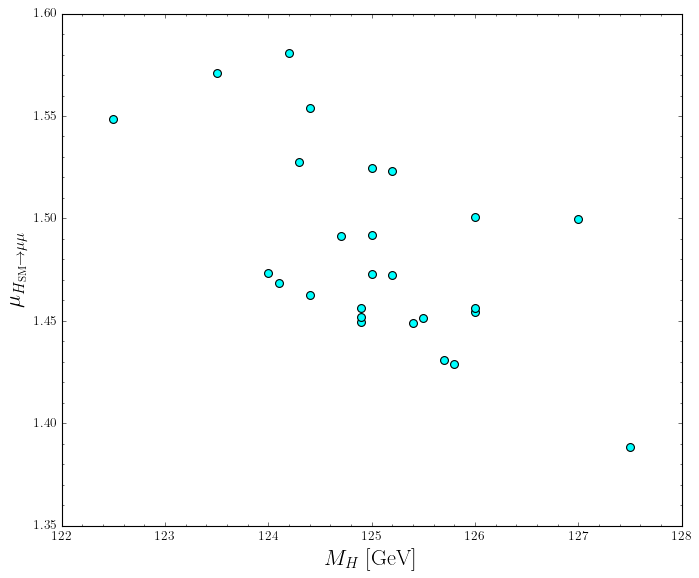

In [201]:
pyplot.rcParams['figure.figsize'] = (10.0, 8.0)
cm = plt.cm.get_cmap('jet')

fig, ax2 = plt.subplots()
fig.set_facecolor('white')

#col = np.array(df_sub_DA["Tep"])

#ax1.plot([-5, 5], [-5, 5], ls="--", c="black", zorder=50)

R_hh1tomumu = df_sub_123sigma_discretehh1["hh1tomumu"]/df_sub_123sigma_discretehh1["hhtomumu_SM"]

sc2 = ax2.scatter(df_sub_123sigma_discretehh1["hh1"], np.array(R_hh1tomumu), c='cyan', marker='o', s=50, zorder=5)
#sc1 = ax1.scatter(np.array(df_sub_123sigma_BinoLSP["Cha1"])/1000., np.array(abs(df_sub_123sigma_BinoLSP["Chi1"]))/1000., c='lime', marker='o',  s=50, zorder=4, 
#                  label=r"$ {\rm\ \Delta a_e\ and\ \Delta a_\mu\ 2\sigma}$")
#sc1 = ax1.scatter(np.array(abs(df_sub_123sigma_BinoLSP["M1"]))/mueff_3sigma, np.array(abs(df_sub_123sigma_BinoLSP["M2"]))//mueff_3sigma, c='olive', marker='o', s=50, zorder=3, 
#                  label=r"$ {\rm\ \Delta a_e\ and\ \Delta a_\mu\ 3\sigma}$")

#cbar1 = plt.colorbar(sc1, format = "%.2f", extend="both")
#cbar1 = plt.colorbar(sc1, extend='both')

#sc1 = ax1.scatter(np.array(0)*10**12, np.array(0)*10**9, c="black", marker='o', s=100)

#sc1 = ax1.plot(np.array(G2_1sig["DAEL"]), np.array(G2_1sig["DAMU"]), c="red", label=r"$ {1 \sigma} $")
#sc1 = ax1.plot(np.array(G2_2sig["DAEL"]), np.array(G2_2sig["DAMU"]), c="brown", label=r"$ {2 \sigma} $")
#sc1 = ax1.plot(np.array(G2_3sig["DAEL"]), np.array(G2_3sig["DAMU"]), c="darkmagenta", label=r"$ {3 \sigma} $")


#cbar1.set_label(r"$\displaystyle T^\prime_e  {\rm\ [GeV]} $", fontsize=20)
ax2 = plt.xlabel(r"$\displaystyle M_{H} {\rm\ [GeV]}$", fontsize=20)
ax2 = plt.ylabel(r"$\displaystyle \mu_{H_{\rm SM} \to \mu \mu}$", fontsize=20)

#plt.axhline(y=0., color='b', linestyle='-')
#plt.axvline(x=0., color='b', linestyle='-')

plt.xlim([122., 128.])
#plt.ylim([0., 2.5])

#plt.xscale('log')
#plt.yscale('log')

#plt.axhline(y=1., color='black', linestyle='-')
#plt.axvline(x=1., color='black', linestyle='-')

plt.ticklabel_format(useOffset=False)

#plt.text(0.07, -0.2, "SM", fontsize=15)
#plt.text(1.9, 16.5, r"$\displaystyle \frac{M_{Z_R}}{M_{W_R}} = 6.01 $", fontsize=15, bbox=dict(facecolor='green', alpha=0.5))
#plt.minorticks_on()
#plt.tick_params(axis='both', which='both', labelsize=14, direction='in', top="on", right="on", length=6)
#plt.tick_params(which='minor', length=3, color='k', direction='in', top="on", right="on")
# Set both ticks to be outside
#plt.tick_params(which='both', direction='out')
#plt.legend()
#leg=plt.legend(loc='upper left',frameon=True)
#leg.set_zorder(800)
fig.savefig('/Users/oozdal/Dropbox/MagMoment/Results/LeptonG2/Htomumu.png')   # save the figure to file
#plt.close(fig)

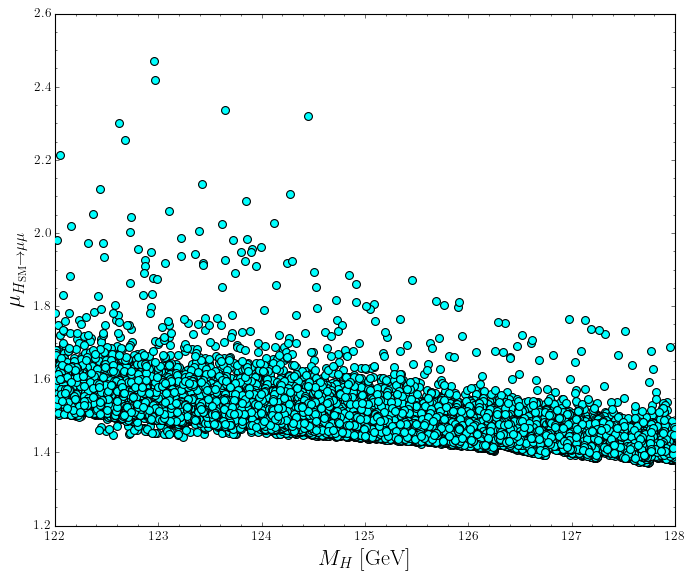

In [202]:
hhtomumu_SM = []
for i in df_sub_123sigma.index:
    hhtomumu_SM.append(htomumu_exp["hhtomumu_SM"][Closest(htomumu_exp["Exp_hh1"], df_sub_123sigma["hh1"][i] )])

df_sub_123sigma["hhtomumu_SM"] = hhtomumu_SM
 
###############################################################

pyplot.rcParams['figure.figsize'] = (10.0, 8.0)
cm = plt.cm.get_cmap('jet')

fig, ax2 = plt.subplots()
fig.set_facecolor('white')

#col = abs(np.array(df_sub_123sigma["Ql2"]))

#ax1.plot([-5, 5], [-5, 5], ls="--", c="black", zorder=50)

R_hh1tomumu = df_sub_123sigma["hh1tomumu"]/df_sub_123sigma["hhtomumu_SM"]

sc2 = ax2.scatter(df_sub_123sigma["hh1"], np.array(R_hh1tomumu), c="cyan", marker='o', s=50, zorder=5)
#sc1 = ax1.scatter(np.array(df_sub_123sigma_BinoLSP["Cha1"])/1000., np.array(abs(df_sub_123sigma_BinoLSP["Chi1"]))/1000., c='lime', marker='o',  s=50, zorder=4, 
#                  label=r"$ {\rm\ \Delta a_e\ and\ \Delta a_\mu\ 2\sigma}$")
#sc1 = ax1.scatter(np.array(abs(df_sub_123sigma_BinoLSP["M1"]))/mueff_3sigma, np.array(abs(df_sub_123sigma_BinoLSP["M2"]))//mueff_3sigma, c='olive', marker='o', s=50, zorder=3, 
#                  label=r"$ {\rm\ \Delta a_e\ and\ \Delta a_\mu\ 3\sigma}$")

#cbar1 = plt.colorbar(sc1, format = "%.2f", extend="both")
#cbar2 = plt.colorbar(sc2, extend='both')

#sc1 = ax1.scatter(np.array(0)*10**12, np.array(0)*10**9, c="black", marker='o', s=100)

#sc1 = ax1.plot(np.array(G2_1sig["DAEL"]), np.array(G2_1sig["DAMU"]), c="red", label=r"$ {1 \sigma} $")
#sc1 = ax1.plot(np.array(G2_2sig["DAEL"]), np.array(G2_2sig["DAMU"]), c="brown", label=r"$ {2 \sigma} $")
#sc1 = ax1.plot(np.array(G2_3sig["DAEL"]), np.array(G2_3sig["DAMU"]), c="darkmagenta", label=r"$ {3 \sigma} $")


#cbar1.set_label(r"$\displaystyle T^\prime_e  {\rm\ [GeV]} $", fontsize=20)
ax2 = plt.xlabel(r"$\displaystyle M_{H} {\rm\ [GeV]}$", fontsize=20)
ax2 = plt.ylabel(r"$\displaystyle \mu_{H_{\rm SM} \to \mu \mu}$", fontsize=20)

#plt.axhline(y=0., color='b', linestyle='-')
#plt.axvline(x=0., color='b', linestyle='-')

plt.xlim([122., 128.])
plt.ylim([1.2, 2.6])

#plt.xscale('log')
#plt.yscale('log')

#plt.axhline(y=1., color='black', linestyle='-')
#plt.axvline(x=1., color='black', linestyle='-')

plt.ticklabel_format(useOffset=False)

#plt.text(0.07, -0.2, "SM", fontsize=15)
#plt.text(1.9, 16.5, r"$\displaystyle \frac{M_{Z_R}}{M_{W_R}} = 6.01 $", fontsize=15, bbox=dict(facecolor='green', alpha=0.5))
#plt.minorticks_on()
#plt.tick_params(axis='both', which='both', labelsize=14, direction='in', top="on", right="on", length=6)
#plt.tick_params(which='minor', length=3, color='k', direction='in', top="on", right="on")
# Set both ticks to be outside
#plt.tick_params(which='both', direction='out')
#plt.legend()
#leg=plt.legend(loc='upper left',frameon=True)
#leg.set_zorder(800)
fig.savefig('/Users/oozdal/Dropbox/MagMoment/Results/LeptonG2/Htomumu_AllData.png')   # save the figure to file
#plt.close(fig)

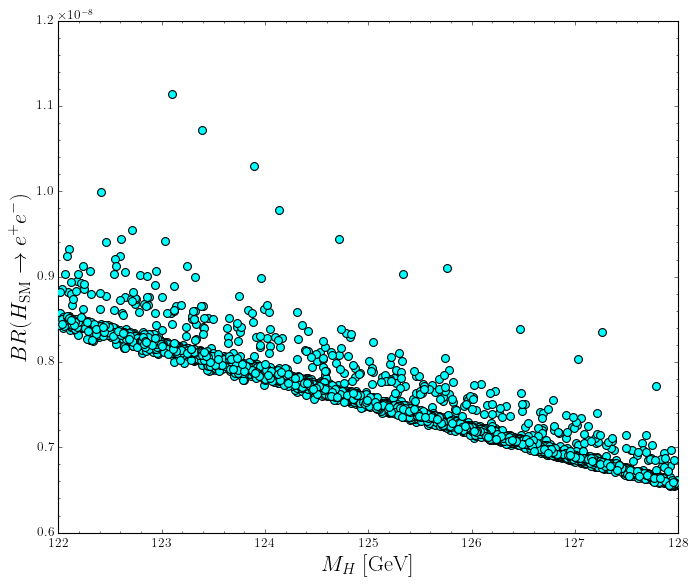

In [203]:
df_sub_123sigma_hh1toee = df_sub_123sigma[df_sub_123sigma["hh1toee"] != 0.0]
#####################################################################

pyplot.rcParams['figure.figsize'] = (10.0, 8.0)
cm = plt.cm.get_cmap('jet')

fig, ax2 = plt.subplots()
fig.set_facecolor('white')

#col = abs(np.array(df_sub_123sigma["Ql2"]))

#ax1.plot([-5, 5], [-5, 5], ls="--", c="black", zorder=50)

sc2 = ax2.scatter(df_sub_123sigma_hh1toee["hh1"], df_sub_123sigma_hh1toee["hh1toee"], c="cyan", marker='o', s=50, zorder=5)
#sc1 = ax1.scatter(np.array(df_sub_123sigma_BinoLSP["Cha1"])/1000., np.array(abs(df_sub_123sigma_BinoLSP["Chi1"]))/1000., c='lime', marker='o',  s=50, zorder=4, 
#                  label=r"$ {\rm\ \Delta a_e\ and\ \Delta a_\mu\ 2\sigma}$")
#sc1 = ax1.scatter(np.array(abs(df_sub_123sigma_BinoLSP["M1"]))/mueff_3sigma, np.array(abs(df_sub_123sigma_BinoLSP["M2"]))//mueff_3sigma, c='olive', marker='o', s=50, zorder=3, 
#                  label=r"$ {\rm\ \Delta a_e\ and\ \Delta a_\mu\ 3\sigma}$")

#cbar1 = plt.colorbar(sc1, format = "%.2f", extend="both")
#cbar2 = plt.colorbar(sc2, extend='both')

#sc1 = ax1.scatter(np.array(0)*10**12, np.array(0)*10**9, c="black", marker='o', s=100)

#sc1 = ax1.plot(np.array(G2_1sig["DAEL"]), np.array(G2_1sig["DAMU"]), c="red", label=r"$ {1 \sigma} $")
#sc1 = ax1.plot(np.array(G2_2sig["DAEL"]), np.array(G2_2sig["DAMU"]), c="brown", label=r"$ {2 \sigma} $")
#sc1 = ax1.plot(np.array(G2_3sig["DAEL"]), np.array(G2_3sig["DAMU"]), c="darkmagenta", label=r"$ {3 \sigma} $")


#cbar1.set_label(r"$\displaystyle T^\prime_e  {\rm\ [GeV]} $", fontsize=20)
ax2 = plt.xlabel(r"$\displaystyle M_{H} {\rm\ [GeV]}$", fontsize=20)
ax2 = plt.ylabel(r"$\displaystyle BR(H_{\rm SM} \to e^+ e^-)$", fontsize=20)

#plt.axhline(y=0., color='b', linestyle='-')
#plt.axvline(x=0., color='b', linestyle='-')

plt.xlim([122., 128.])
#plt.ylim([1.2, 2.6])

#plt.xscale('log')
#plt.yscale('log')

#plt.axhline(y=1., color='black', linestyle='-')
#plt.axvline(x=1., color='black', linestyle='-')

plt.ticklabel_format(useOffset=False)

#plt.text(0.07, -0.2, "SM", fontsize=15)
#plt.text(1.9, 16.5, r"$\displaystyle \frac{M_{Z_R}}{M_{W_R}} = 6.01 $", fontsize=15, bbox=dict(facecolor='green', alpha=0.5))
#plt.minorticks_on()
#plt.tick_params(axis='both', which='both', labelsize=14, direction='in', top="on", right="on", length=6)
#plt.tick_params(which='minor', length=3, color='k', direction='in', top="on", right="on")
# Set both ticks to be outside
#plt.tick_params(which='both', direction='out')
#plt.legend()
#leg=plt.legend(loc='upper left',frameon=True)
#leg.set_zorder(800)
fig.savefig('/Users/oozdal/Dropbox/MagMoment/Results/LeptonG2/BRhtoee_SMHiggs.png')   # save the figure to file
#plt.close(fig)

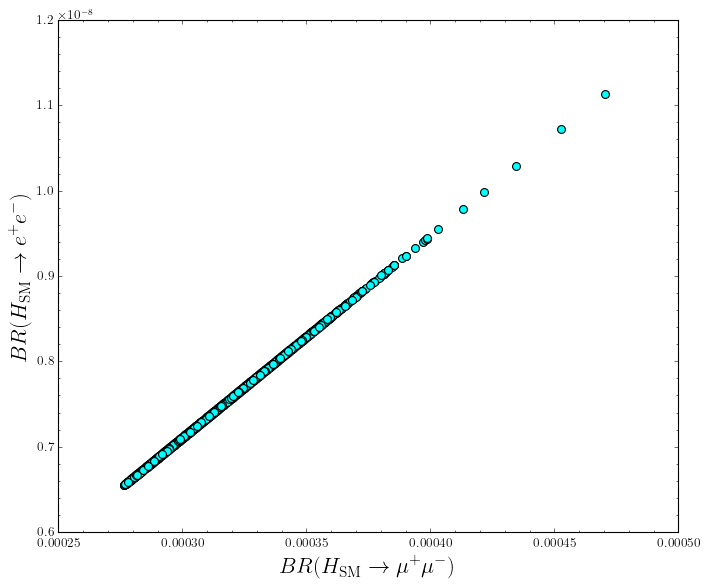

In [204]:
df_sub_123sigma_hh1toee = df_sub_123sigma[df_sub_123sigma["hh1toee"] != 0.0]
#####################################################################

pyplot.rcParams['figure.figsize'] = (10.0, 8.0)
cm = plt.cm.get_cmap('jet')

fig, ax2 = plt.subplots()
fig.set_facecolor('white')

#col = abs(np.array(df_sub_123sigma["Ql2"]))

#ax1.plot([-5, 5], [-5, 5], ls="--", c="black", zorder=50)

sc2 = ax2.scatter(df_sub_123sigma_hh1toee["hh1tomumu"], df_sub_123sigma_hh1toee["hh1toee"], c="cyan", marker='o', s=50, zorder=5)
#sc1 = ax1.scatter(np.array(df_sub_123sigma_BinoLSP["Cha1"])/1000., np.array(abs(df_sub_123sigma_BinoLSP["Chi1"]))/1000., c='lime', marker='o',  s=50, zorder=4, 
#                  label=r"$ {\rm\ \Delta a_e\ and\ \Delta a_\mu\ 2\sigma}$")
#sc1 = ax1.scatter(np.array(abs(df_sub_123sigma_BinoLSP["M1"]))/mueff_3sigma, np.array(abs(df_sub_123sigma_BinoLSP["M2"]))//mueff_3sigma, c='olive', marker='o', s=50, zorder=3, 
#                  label=r"$ {\rm\ \Delta a_e\ and\ \Delta a_\mu\ 3\sigma}$")

#cbar1 = plt.colorbar(sc1, format = "%.2f", extend="both")
#cbar2 = plt.colorbar(sc2, extend='both')

#sc1 = ax1.scatter(np.array(0)*10**12, np.array(0)*10**9, c="black", marker='o', s=100)

#sc1 = ax1.plot(np.array(G2_1sig["DAEL"]), np.array(G2_1sig["DAMU"]), c="red", label=r"$ {1 \sigma} $")
#sc1 = ax1.plot(np.array(G2_2sig["DAEL"]), np.array(G2_2sig["DAMU"]), c="brown", label=r"$ {2 \sigma} $")
#sc1 = ax1.plot(np.array(G2_3sig["DAEL"]), np.array(G2_3sig["DAMU"]), c="darkmagenta", label=r"$ {3 \sigma} $")


#cbar1.set_label(r"$\displaystyle T^\prime_e  {\rm\ [GeV]} $", fontsize=20)
ax2 = plt.xlabel(r"$\displaystyle BR(H_{\rm SM} \to \mu^+ \mu^-)$", fontsize=20)
ax2 = plt.ylabel(r"$\displaystyle BR(H_{\rm SM} \to e^+ e^-)$", fontsize=20)

#plt.axhline(y=0., color='b', linestyle='-')
#plt.axvline(x=0., color='b', linestyle='-')

#plt.xlim([122., 128.])
#plt.ylim([1.2, 2.6])

#plt.xscale('log')
#plt.yscale('log')

#plt.axhline(y=1., color='black', linestyle='-')
#plt.axvline(x=1., color='black', linestyle='-')

#plt.ticklabel_format(useOffset=False)

#plt.text(0.07, -0.2, "SM", fontsize=15)
#plt.text(1.9, 16.5, r"$\displaystyle \frac{M_{Z_R}}{M_{W_R}} = 6.01 $", fontsize=15, bbox=dict(facecolor='green', alpha=0.5))
#plt.minorticks_on()
#plt.tick_params(axis='both', which='both', labelsize=14, direction='in', top="on", right="on", length=6)
#plt.tick_params(which='minor', length=3, color='k', direction='in', top="on", right="on")
# Set both ticks to be outside
#plt.tick_params(which='both', direction='out')
#plt.legend()
#leg=plt.legend(loc='upper left',frameon=True)
#leg.set_zorder(800)
fig.savefig('/Users/oozdal/Dropbox/MagMoment/Results/LeptonG2/BRhtoee_BRhtomumu.png')   # save the figure to file
#plt.close(fig)

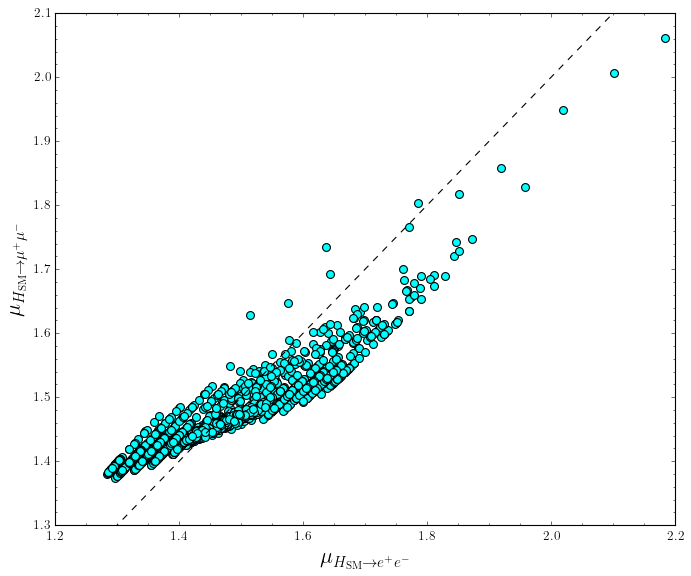

In [214]:
df_sub_123sigma_hh1toee = df_sub_123sigma[df_sub_123sigma["hh1toee"] != 0.0]
#####################################################################

hhtomumu_SM = []
for i in df_sub_123sigma_hh1toee.index:
    hhtomumu_SM.append(htomumu_exp["hhtomumu_SM"][Closest(htomumu_exp["Exp_hh1"], df_sub_123sigma_hh1toee["hh1"][i] )])

df_sub_123sigma_hh1toee = df_sub_123sigma_hh1toee.copy()
df_sub_123sigma_hh1toee["hhtomumu_SM"] = hhtomumu_SM
     
#####################################################################

pyplot.rcParams['figure.figsize'] = (10.0, 8.0)
cm = plt.cm.get_cmap('jet')

fig, ax2 = plt.subplots()
fig.set_facecolor('white')

R_hh1toee   = df_sub_123sigma_hh1toee["hh1toee"]/5.1e-9
R_hh1tomumu = df_sub_123sigma_hh1toee["hh1tomumu"]/df_sub_123sigma_hh1toee["hhtomumu_SM"]

#col = abs(np.array(df_sub_123sigma["Ql2"]))

ax2.plot([-5, 5], [-5, 5], ls="--", c="black", zorder=50)

sc2 = ax2.scatter(R_hh1toee, R_hh1tomumu, c="cyan", marker='o', s=50, zorder=5)
#sc1 = ax1.scatter(np.array(df_sub_123sigma_BinoLSP["Cha1"])/1000., np.array(abs(df_sub_123sigma_BinoLSP["Chi1"]))/1000., c='lime', marker='o',  s=50, zorder=4, 
#                  label=r"$ {\rm\ \Delta a_e\ and\ \Delta a_\mu\ 2\sigma}$")
#sc1 = ax1.scatter(np.array(abs(df_sub_123sigma_BinoLSP["M1"]))/mueff_3sigma, np.array(abs(df_sub_123sigma_BinoLSP["M2"]))//mueff_3sigma, c='olive', marker='o', s=50, zorder=3, 
#                  label=r"$ {\rm\ \Delta a_e\ and\ \Delta a_\mu\ 3\sigma}$")

#cbar1 = plt.colorbar(sc1, format = "%.2f", extend="both")
#cbar2 = plt.colorbar(sc2, extend='both')

#sc1 = ax1.scatter(np.array(0)*10**12, np.array(0)*10**9, c="black", marker='o', s=100)

#sc1 = ax1.plot(np.array(G2_1sig["DAEL"]), np.array(G2_1sig["DAMU"]), c="red", label=r"$ {1 \sigma} $")
#sc1 = ax1.plot(np.array(G2_2sig["DAEL"]), np.array(G2_2sig["DAMU"]), c="brown", label=r"$ {2 \sigma} $")
#sc1 = ax1.plot(np.array(G2_3sig["DAEL"]), np.array(G2_3sig["DAMU"]), c="darkmagenta", label=r"$ {3 \sigma} $")


#cbar1.set_label(r"$\displaystyle T^\prime_e  {\rm\ [GeV]} $", fontsize=20)
ax2 = plt.xlabel(r"$\displaystyle \mu_{H_{\rm SM} \to e^+ e^-}$", fontsize=20)
ax2 = plt.ylabel(r"$\displaystyle \mu_{H_{\rm SM} \to \mu^+ \mu^-}$", fontsize=20)


#plt.axhline(y=0., color='b', linestyle='-')
#plt.axvline(x=0., color='b', linestyle='-')

plt.xlim([1.2, 2.2])
plt.ylim([1.3, 2.1])

#plt.xscale('log')
#plt.yscale('log')

#plt.axhline(y=1., color='black', linestyle='-')
#plt.axvline(x=1., color='black', linestyle='-')

#plt.ticklabel_format(useOffset=False)

#plt.text(0.07, -0.2, "SM", fontsize=15)
#plt.text(1.9, 16.5, r"$\displaystyle \frac{M_{Z_R}}{M_{W_R}} = 6.01 $", fontsize=15, bbox=dict(facecolor='green', alpha=0.5))
#plt.minorticks_on()
#plt.tick_params(axis='both', which='both', labelsize=14, direction='in', top="on", right="on", length=6)
#plt.tick_params(which='minor', length=3, color='k', direction='in', top="on", right="on")
# Set both ticks to be outside
#plt.tick_params(which='both', direction='out')
#plt.legend()
#leg=plt.legend(loc='upper left',frameon=True)
#leg.set_zorder(800)
fig.savefig('/Users/oozdal/Dropbox/MagMoment/Results/LeptonG2/Rhtoee_Rhtomumu.png')   # save the figure to file
#plt.close(fig)

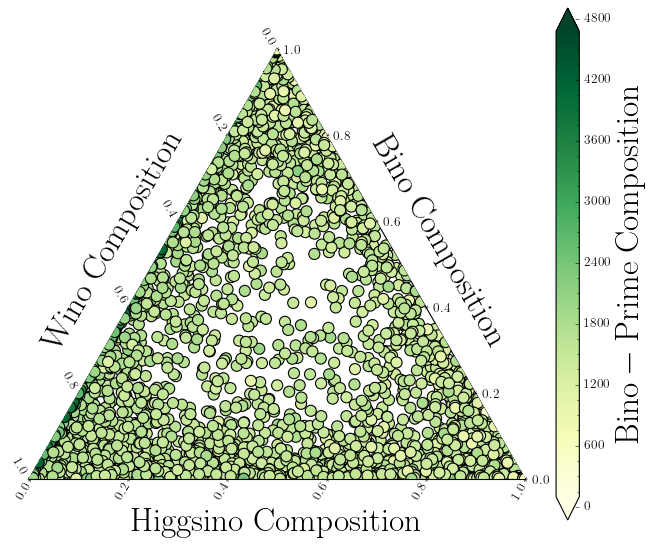

In [260]:
################################################################

df_sub_123sigma_WinoLSP = df_sub_123sigma[  ((df_sub_123sigma["NMIX13"])**2 >= 0.0) ] # Exclude all solution Wino content less than 40%
WinoLike      = np.array(df_sub_123sigma_WinoLSP["NMIX13"])**2

################################################################

df_sub_123sigma_HiggsinoLSP = df_sub_123sigma[  ( ( df_sub_123sigma["NMIX14"])**2 + (df_sub_123sigma["NMIX15"])**2 >= 0.0 ) ] # Exclude all solution Higgsino content less than 40%
HiggsinoLike      = np.array(df_sub_123sigma_HiggsinoLSP["NMIX14"])**2 + np.array(df_sub_123sigma_HiggsinoLSP["NMIX15"])**2

################################################################

################################################################

df_sub_123sigma_BinoLSP = df_sub_123sigma[  ( ( df_sub_123sigma["NMIX12"])**2 >= 0.0 ) ] # Exclude all solution Higgsino content less than 40%
BinoLike      = np.array(df_sub_123sigma_BinoLSP["NMIX12"])**2

################################################################

################################################################

df_sub_123sigma_BinoPrimeLSP = df_sub_123sigma[  ( ( df_sub_123sigma["NMIX16"])**2 >= 0.0 ) ] # Exclude all solution Higgsino content less than 40%
BinoPrimeLike      = np.array(df_sub_123sigma_BinoPrimeLSP["NMIX16"])**2

################################################################

pyplot.rcParams['figure.figsize'] = (10.0, 8.0)

cm = plt.cm.get_cmap('YlGn')

fig, ax1 = plt.subplots()
fig.set_facecolor('white')

ax1 = plt.subplot(projection='ternary')

#col = BinoPrimeLike*100
col = abs(df_sub_123sigma["M2"])

t = BinoLike
l = HiggsinoLike
r = WinoLike

sc1 = ax1.scatter(t, l, r, c=col, cmap=cm,marker="o", zorder=50,
                  label=r" $\rm {Non-UMSSM} $ ", s=100) #norm=colors.LogNorm(vmin=col.min(), vmax=col.max()) 

cbar1 = plt.colorbar(sc1, extend="both") #format = "%.2f"
cbar1.set_label(r"$\displaystyle {\rm\ Bino-Prime\ Composition} $ ", fontsize=30)

ax1.set_tlabel(r"$\displaystyle {\rm\ Bino\ Composition} $", fontsize=30)
ax1.set_llabel(r"$\displaystyle {\rm\ Wino\ Composition} $", fontsize=30)
ax1.set_rlabel(r"$\displaystyle {\rm\ Higgsino\ Composition} $", fontsize=30)

ax1.taxis.set_label_position('tick1')
ax1.laxis.set_label_position('tick1')
ax1.raxis.set_label_position('tick1')

ax1.tick_params(direction='inout')

plt.show()

In [247]:
df_sub_123sigma_HiggsinoLSP = df_sub_123sigma[  ( ( df_sub_123sigma["NMIX14"])**2 + (df_sub_123sigma["NMIX15"])**2 >= 0.9 ) ] 
Higgsino_BM = df_sub_123sigma_HiggsinoLSP[  ( (( df_sub_123sigma_HiggsinoLSP["RelicDensity"]) >= 0.08) 
                                             & ((df_sub_123sigma_HiggsinoLSP["RelicDensity"]) <= 0.12) 
                                             & ((df_sub_123sigma_HiggsinoLSP["DAELDAMU_Sigma"]) == '1sigma') ) ]
Higgsino_BM["j"][5151]
#(Higgsino_BM["xsecpptoZp"]*Higgsino_BM["BRZptoll"]*1000).idxmax()

444

In [243]:
df_sub_123sigma_BinoLSP = df_sub_123sigma[  ( ( df_sub_123sigma["NMIX12"])**2 >= 0.4 ) ]
Bino_BM = df_sub_123sigma_BinoLSP[  ( (( df_sub_123sigma_BinoLSP["RelicDensity"]) >= 0.08) 
                                          & ((df_sub_123sigma_BinoLSP["RelicDensity"]) <= 0.12)         
                                          & ((df_sub_123sigma_BinoLSP["DAELDAMU_Sigma"]) == '1sigma') ) ]
Bino_BM

DAEL          DAMU        vS    gpSUSY       MZp    Lambda  \
656   -9.025286e-13  3.294142e-09  14199.89  0.482539  5739.221  0.195603   
720   -7.088422e-13  2.134031e-09  17839.63  0.481947  7177.823  0.215189   
731   -1.045227e-12  3.801807e-09  15025.38  0.482403  6065.912  0.182929   
794   -1.143522e-12  3.129253e-09  16530.50  0.481725  6648.247  0.232415   
807   -8.484455e-13  3.518648e-09  14028.72  0.481991  5654.763  0.188182   
...             ...           ...       ...       ...       ...       ...   
33491 -8.405161e-13  2.198719e-09  15670.42  0.471687  7379.294  0.338981   
33563 -6.662533e-13  3.235438e-09  14322.95  0.482139  5776.717  0.182954   
33564 -5.360394e-13  3.387038e-09  16427.46  0.481455  6596.807  0.191956   
33591 -7.069685e-13  3.413372e-09  12331.53  0.483178  5004.386  0.165991   
33615 -3.827045e-13  3.254308e-09  14447.59  0.481854  6106.292  0.164276   

        TLambda      TYe33       Tep      Tmup  ...      MVR022      MVR032  \
656    3628.490 -207.89370 -5852.618  6275.815  ...   9011411.0  18996810.0   
720    2926.152 -202.28260 -3578.089  4660.890  ...   2064407.0  21247910.0   
731    4104.024 -206.04520 -5541.764  5961.656  ...  11732470.0  22492240.0   
794    2312.777 -152.02730 -4301.307  6720.456  ...   1595129.0  20394670.0   
807    4877.183 -214.15380 -5691.578  6705.372  ...  10483370.0  19948790.0   
...         ...        ...       ...       ...  ...         ...         ...   
33491  5384.466   22.41128  4611.713 -9550.429  ...   1607367.0  22345140.0   
33563  3768.295 -279.14020 -4932.134  5501.836  ...   8611206.0  19069110.0   
33564  3325.083 -192.30350 -2949.970  5421.826  ...   1746171.0  25716120.0   
33591  3647.294 -211.14360 -5962.498  5979.408  ...   9856512.0  20343130.0   
33615  4389.671   28.64669  2373.451 -6780.145  ...  21523130.0  18417560.0   

            Chi2      Chi3      Cha2       hh1  hh1tomumu       Ql2       Qe2  \
656    1987.5120 -1992.860  2562.440  125.2636   0.000315  0.333333  0.000000   
720    2732.1520 -2739.412  3231.959  127.6087   0.000282  0.333333  0.000000   
731    1950.6870 -1970.356  2139.856  124.8761   0.000321  0.333333  0.000000   
794    2710.7040 -2736.197  2879.149  124.5638   0.000323  0.333333  0.000000   
807    1880.6400 -1891.783  2183.392  123.7139   0.000336  0.333333  0.000000   
...          ...       ...       ...       ...        ...       ...       ...   
33491   776.9566 -3761.737  3762.524  126.3809   0.000309 -0.333333 -0.166667   
33563  1873.4010 -1879.647  2371.606  126.7436   0.000294  0.333333  0.000000   
33564  2250.3300 -2252.663  3565.339  125.2845   0.000311  0.333333  0.000000   
33591  1474.7400 -1476.640  2520.281  125.6650   0.000309  0.333333  0.000000   
33615   746.5902 -1703.013  1705.832  123.9961   0.000337 -0.625000  0.250000   

            hh1toee  
656    0.000000e+00  
720    0.000000e+00  
731    0.000000e+00  
794    7.642158e-09  
807    7.953954e-09  
...             ...  
33491  0.000000e+00  
33563  6.974576e-09  
33564  7.377216e-09  
33591  7.328974e-09  
33615  7.971024e-09  

[347 rows x 62 columns]

In [75]:
#(Bino_BM['xsecpptoZp']*Bino_BM['BRZptoll']).idxmax()
#(Bino_BM['xsecpptoZp'][3065]*Bino_BM['BRZptoll'][3065])
#(Bino_BM["Chi1"]).idxmin()
Bino_BM["Chi1"]

656      1334.3260
720      1269.0140
731      1257.8680
857       878.1420
1410     1733.5540
           ...    
29308    1189.1960
29337    1292.3230
29734    1108.4300
29905    1499.9150
30132     750.5007
Name: Chi1, Length: 137, dtype: float64

In [76]:
df_sub_123sigma_BinoLSP = df_sub_123sigma[  ( ( df_sub_123sigma["NMIX12"])**2 >= 0.4 ) ]
Bino_BM = df_sub_123sigma_BinoLSP[  ( (( df_sub_123sigma_BinoLSP["RelicDensity"]) < 1.0)          
                                          & ((df_sub_123sigma_BinoLSP["DAELDAMU_Sigma"]) == '1sigma') ) ]

Bino_BM

DAEL          DAMU        vS    gpSUSY       MZp    Lambda  \
92    -4.830712e-13  3.168562e-09  11509.80  0.463343  5404.225  0.327600   
95    -1.125125e-12  1.994925e-09  13241.29  0.462635  6253.125  0.286414   
183   -5.034243e-13  2.642874e-09  15665.21  0.496366  6069.275  0.227581   
255   -9.918611e-13  2.158704e-09  16694.14  0.481984  6721.707  0.191264   
265   -9.865771e-13  3.788984e-09  15829.91  0.482178  6382.212  0.233623   
...             ...           ...       ...       ...       ...       ...   
30155 -6.964814e-13  3.987940e-09  13297.58  0.482275  5369.490  0.201102   
30156 -4.969304e-13  3.453507e-09  13369.76  0.457246  6151.845  0.241653   
30174 -1.224724e-12  3.576268e-09  20934.16  0.482010  8414.893  0.248561   
30176 -7.220072e-13  3.164885e-09  15340.57  0.481879  6176.102  0.218192   
30177 -6.949400e-13  3.948537e-09  13074.44  0.482283  5280.053  0.205437   

         TLambda     TYe33       Tep      Tmup  ...       ME032       ML012  \
92     -669.5497  148.6726 -3847.395  6833.841  ...   7418356.0  12593270.0   
95     -682.0865  201.8918 -4429.857  6123.016  ...   6549115.0  14061740.0   
183    5581.8720 -448.6351 -2323.473  8340.925  ...  18397030.0  21621540.0   
255    3963.2320 -226.0561 -5449.896  5551.232  ...  10078440.0  28065050.0   
265    2785.7340 -154.8124 -3570.681  5339.456  ...   5535930.0  22203560.0   
...          ...       ...       ...       ...  ...         ...         ...   
30155  3953.7290 -220.2592 -4933.312  6713.011  ...   9564245.0  27095550.0   
30156  4441.9860 -194.9615 -3474.630  9015.738  ...  22788740.0  23387650.0   
30174  2439.2380 -168.1016 -3693.593  4886.480  ...   4684773.0  30078350.0   
30176  2915.0540 -172.1254 -3586.440  5737.230  ...   4748498.0  26325360.0   
30177  3757.4460 -242.0599 -5423.297  6633.606  ...   8553947.0  30149080.0   

            ML022       ML032      MVR012      MVR022      MVR032      Chi2  \
92     25598340.0  29586300.0   5403258.0  24329410.0  27497220.0 -1621.129   
95     22567310.0  28616180.0   4593849.0  27683580.0  29961950.0 -1545.923   
183    20516230.0   6875319.0  19740080.0  16501810.0  13465070.0  1787.870   
255    24795680.0   3412055.0   7589942.0   9457599.0  20491910.0  2075.728   
265    22572160.0   4883475.0  30678740.0   1834109.0  21986750.0  2631.818   
...           ...         ...         ...         ...         ...       ...   
30155  24513130.0   3513467.0   7437625.0  11825100.0  21116560.0  1903.020   
30156  30409390.0  17453080.0  17282170.0   9243802.0  14778060.0  1985.879   
30174  21242710.0   5374844.0  31898190.0   1834911.0  21368090.0  3012.527   
30176  26841410.0   5326030.0  30810590.0   1798719.0  21782790.0  2387.995   
30177  24772630.0   3047630.0   6823573.0  11870480.0  20899140.0  1917.602   

           Chi3      Cha2  
92     2718.056  2720.090  
95     2753.943  2755.857  
183   -2536.704  2540.915  
255   -2280.576  2296.719  
265   -2640.568  3059.858  
...         ...       ...  
30155 -1917.279  2147.240  
30156 -2314.512  2324.659  
30174 -3694.746  3700.106  
30176 -2391.779  3309.288  
30177 -1926.271  2296.975  

[1214 rows x 57 columns]

In [77]:
df_sub_123sigma_BinoLSP = df_sub_123sigma[  ( ( df_sub_123sigma["NMIX12"])**2 >= 0.9 ) ]
Bino_BM = df_sub_123sigma_BinoLSP[  ( (df_sub_123sigma_BinoLSP["RelicDensity"] < 1.0) & (df_sub_123sigma_BinoLSP["Chi1"] < 1250)          
                                    ) ]
Bino_BM

DAEL          DAMU        vS    gpSUSY       MZp    Lambda  \
88    -1.370171e-13  1.087457e-09  14871.52  0.505428  5371.783  0.077999   
92    -4.830712e-13  3.168562e-09  11509.80  0.463343  5404.225  0.327600   
93    -1.136485e-13  1.088103e-09  16166.22  0.505449  5836.196  0.071732   
94    -1.576175e-13  2.725861e-09  12016.33  0.465273  5695.820  0.307763   
95    -1.125125e-12  1.994925e-09  13241.29  0.462635  6253.125  0.286414   
...             ...           ...       ...       ...       ...       ...   
30180 -3.807178e-13  1.756580e-09  13261.97  0.489821  5620.601  0.161457   
30183 -3.016812e-14  2.046014e-09  18708.36  0.505348  6752.671  0.351459   
30191 -1.149152e-12  4.588922e-09  16027.14  0.482495  6471.149  0.188129   
30193 -5.007945e-13  1.548344e-09  14835.19  0.508500  5443.748  0.292390   
30194 -3.701161e-13  1.044616e-09  14522.66  0.465472  6778.109  0.152936   

         TLambda       TYe33        Tep      Tmup  ...       ME032  \
88     1302.2330 -396.396300 -3430.0950  1637.621  ...  13541150.0   
92     -669.5497  148.672600 -3847.3950  6833.841  ...   7418356.0   
93     1332.5910 -310.430900 -2950.5780  1577.362  ...  13301290.0   
94     -676.6408  129.665500 -4555.9230  6797.763  ...   7840141.0   
95     -682.0865  201.891800 -4429.8570  6123.016  ...   6549115.0   
...          ...         ...        ...       ...  ...         ...   
30180 -1589.9730  -68.424250 -1692.1280  3710.711  ...  12702230.0   
30183  5741.6800    2.025704  -143.3752  4844.920  ...  30331460.0   
30191  4135.6640 -237.949600 -5473.9820  5814.583  ...  11381910.0   
30193  8840.0070   78.017770 -2255.9710  6639.774  ...   4309904.0   
30194  4583.7180   33.825730  2153.3810 -7426.278  ...  23890330.0   

            ML012       ML022       ML032      MVR012      MVR022      MVR032  \
88     27100550.0   2893924.0   9551533.0   6179699.0  15348540.0   7114996.0   
92     12593270.0  25598340.0  29586300.0   5403258.0  24329410.0  27497220.0   
93     28706310.0   3419285.0   9348996.0   5490486.0  16890720.0   6119238.0   
94      8461923.0  28385670.0  29831750.0   5738724.0  28266420.0  27426660.0   
95     14061740.0  22567310.0  28616180.0   4593849.0  27683580.0  29961950.0   
...           ...         ...         ...         ...         ...         ...   
30180  14436280.0   1901636.0   9278250.0   2466254.0  19714880.0   3895263.0   
30183  27043430.0  27302840.0  21592560.0  30191520.0    897485.1  22479980.0   
30191  24644370.0  23188370.0   3136658.0   9634111.0  10173700.0  18767960.0   
30193  19024920.0  19230470.0  10216590.0  29512020.0    904598.2  30048640.0   
30194  19514190.0  13150740.0   2454613.0   1720319.0  18345550.0  26578150.0   

            Chi2       Chi3      Cha2  
88      835.8384  -837.6664  2635.016  
92    -1621.1290  2718.0560  2720.090  
93      834.8108  -837.3701  2177.479  
94    -1336.8280  2681.1140  2682.721  
95    -1545.9230  2753.9430  2755.857  
...          ...        ...       ...  
30180  1247.7160 -1540.1020  1550.729  
30183  -579.2320  4654.8210  4655.621  
30191  2034.5980 -2158.2200  2184.271  
30193 -2650.6420  3123.3340  3128.306  
30194   792.3966 -1596.5630  1599.894  

[3459 rows x 57 columns]

In [78]:
GoodRD = df_sub_123sigma[ (df_sub_123sigma["RelicDensity"] < 5.0) ]
GoodRD

DAEL          DAMU        vS    gpSUSY       MZp    Lambda  \
1     -5.297234e-13  9.606797e-10  16806.53  0.483480  6813.462  0.082405   
2     -1.077944e-12  7.365571e-10  13375.53  0.471490  6299.864  0.240866   
3     -6.679858e-13  1.129891e-09  16618.48  0.471660  7875.719  0.064426   
4     -2.060117e-13  1.287903e-09  13379.48  0.501219  5058.067  0.178568   
6     -3.772227e-13  2.238636e-09  13321.33  0.452920  6050.331  0.280865   
...             ...           ...       ...       ...       ...       ...   
30190 -2.613948e-13  1.963513e-09  11905.18  0.472706  5108.938  0.132021   
30191 -1.149152e-12  4.588922e-09  16027.14  0.482495  6471.149  0.188129   
30192 -2.523629e-13  1.781448e-09  11413.48  0.458125  5286.757  0.142861   
30193 -5.007945e-13  1.548344e-09  14835.19  0.508500  5443.748  0.292390   
30194 -3.701161e-13  1.044616e-09  14522.66  0.465472  6778.109  0.152936   

          TLambda      TYe33       Tep      Tmup  ...       ME032       ML012  \
1       1197.3230 -285.30340 -3026.312  5271.951  ...   1503534.0  19746440.0   
2       8512.0870  -80.18170 -2638.551  8103.340  ...  16657920.0  15755130.0   
3      13146.3200   40.30300  2366.987 -5144.933  ...  11657830.0  15829220.0   
4        808.6221 -168.76720  1887.456 -8119.648  ...  11358180.0  27057160.0   
6      11462.6200   21.82407  1078.588 -6053.333  ...   1441517.0  11538410.0   
...           ...        ...       ...       ...  ...         ...         ...   
30190  -1372.5040  -57.24827 -1438.862  4231.852  ...  12221480.0  16549230.0   
30191   4135.6640 -237.94960 -5473.982  5814.583  ...  11381910.0  24644370.0   
30192  -1631.3630  -79.39700 -1454.990  3960.074  ...  10920080.0  17615900.0   
30193   8840.0070   78.01777 -2255.971  6639.774  ...   4309904.0  19024920.0   
30194   4583.7180   33.82573  2153.381 -7426.278  ...  23890330.0  19514190.0   

            ML022       ML032      MVR012      MVR022      MVR032       Chi2  \
1      23229720.0   8566024.0  28860020.0  29315290.0  13737130.0 -1003.7620   
2      29241480.0  15450240.0  26897550.0  13442870.0  13204580.0  1681.9910   
3       7799881.0   1077947.0   7408298.0  23169300.0  12752490.0  -777.1562   
4      19826040.0   6923955.0  26464170.0  12307370.0   6035462.0  1713.8960   
6       9667199.0  25526360.0  29540870.0  21679650.0  22782180.0 -1445.1030   
...           ...         ...         ...         ...         ...        ...   
30190   2212119.0   6784711.0   2155895.0  24014710.0   4285308.0   960.4961   
30191  23188370.0   3136658.0   9634111.0  10173700.0  18767960.0  2034.5980   
30192   2180654.0   8530420.0   2281416.0  20170240.0   4734568.0  1096.3560   
30193  19230470.0  10216590.0  29512020.0    904598.2  30048640.0 -2650.6420   
30194  13150740.0   2454613.0   1720319.0  18345550.0  26578150.0   792.3966   

            Chi3       Cha2  
1      1381.5610  1380.9450  
2     -2298.2280  2299.4430  
3       951.0969   951.2761  
4     -1977.1620  2914.2930  
6      2676.9970  2677.9590  
...          ...        ...  
30190 -1131.9100  1149.8730  
30191 -2158.2200  2184.2710  
30192 -1177.1760  1212.4330  
30193  3123.3340  3128.3060  
30194 -1596.5630  1599.8940  

[26415 rows x 57 columns]

In [79]:
df_sub_123sigma_WinoLSP = df_sub_123sigma[  ((df_sub_123sigma["NMIX13"])**2 >= 0.9) ] # Exclude all solution Wino content less than 40%

#df_sub_123sigma_WinoLSP = df_sub_123sigma[  ((df_sub_123sigma["NMIX13"])**2 >= 0.9)
#                                            & ((df_sub_123sigma["DAELDAMU_Sigma"]) == '1sigma')
#                                            & ((df_sub_123sigma["RelicDensity"]) <= 0.12) 
#                                            & ((df_sub_123sigma["RelicDensity"]) >= 0.08)
#                                         ]

Wino_BM      = df_sub_123sigma_WinoLSP[ ((df_sub_123sigma_WinoLSP["Chi1"] >1200) & (df_sub_123sigma_WinoLSP["Chi1"] < 1400) )
                                      | ((df_sub_123sigma_WinoLSP["Chi1"] >1900) & (df_sub_123sigma_WinoLSP["Chi1"] < 2100) ) ]

df_sub_123sigma_WinoLSP

DAEL          DAMU        vS    gpSUSY       MZp    Lambda  \
2     -1.077944e-12  7.365571e-10  13375.53  0.471490  6299.864  0.240866   
6     -3.772227e-13  2.238636e-09  13321.33  0.452920  6050.331  0.280865   
7     -1.261250e-13  1.303699e-09  16899.45  0.456153  6900.741  0.203980   
13    -7.849337e-13  2.344367e-09  15083.27  0.459846  6953.568  0.259576   
96    -7.188648e-13  6.381532e-10  18033.29  0.487017  7521.501  0.176154   
...             ...           ...       ...       ...       ...       ...   
30184 -2.982647e-14  4.360927e-09  17966.15  0.505400  6485.359  0.286265   
30185 -2.884098e-14  2.015568e-09  18566.09  0.505698  6709.553  0.267559   
30186 -2.426854e-14  1.303078e-09  17915.65  0.505196  6461.922  0.299868   
30187 -9.687478e-13  8.147811e-10  12239.75  0.471137  5760.989  0.259376   
30188 -2.586471e-14  1.414969e-09  17813.56  0.505336  6429.716  0.306903   

          TLambda       TYe33        Tep      Tmup  ...       ME032  \
2       8512.0870  -80.181700 -2638.5510  8103.340  ...  16657920.0   
6      11462.6200   21.824070  1078.5880 -6053.333  ...   1441517.0   
7       7079.1140 -187.851500  -999.4263  8312.772  ...  29224080.0   
13      6703.7230   69.267570  1901.9870 -8515.310  ...  11134150.0   
96      6427.3030   -9.850268  3558.2160 -4189.308  ...  26719470.0   
...           ...         ...        ...       ...  ...         ...   
30184   5961.0780   11.113400  -138.5987  4878.772  ...  23862710.0   
30185   5311.1820   11.092850  -150.9429  4784.204  ...  28246170.0   
30186   6187.7440    4.523560  -157.3029  4819.741  ...  31860760.0   
30187    310.0135   18.823890  5921.7060 -3860.546  ...  26940710.0   
30188   5099.0200    8.114866  -158.9617  4378.297  ...  29812990.0   

            ML012       ML022       ML032      MVR012      MVR022      MVR032  \
2      15755130.0  29241480.0  15450240.0  26897550.0  13442870.0  13204580.0   
6      11538410.0   9667199.0  25526360.0  29540870.0  21679650.0  22782180.0   
7      29752850.0  10314370.0  24566060.0   5862806.0  22997310.0   9116560.0   
13     19688750.0  20767530.0  13658150.0   1508521.0  22791420.0   5822786.0   
96     27691590.0   1479620.0   8234236.0   5673815.0  11456380.0  15286280.0   
...           ...         ...         ...         ...         ...         ...   
30184  25018150.0  21263540.0  16714530.0  29375010.0    694986.7  27041000.0   
30185  26396240.0  22696540.0  18397160.0  31464570.0    836522.8  23997970.0   
30186  26681690.0  20418790.0  17251210.0  25188820.0    936467.1  20862860.0   
30187  14927010.0   4576376.0   6386372.0  10190960.0  20454780.0  16419790.0   
30188  26252530.0  20933780.0  17202730.0  28947230.0    860768.5  22533220.0   

            Chi2      Chi3      Cha2  
2      1681.9910 -2298.228  2299.443  
6     -1445.1030  2676.997  2677.959  
7      1278.8460 -2471.512  2473.010  
13    -1854.1520  2788.653  2789.581  
96     -939.0344 -2266.625  2268.384  
...          ...       ...       ...  
30184   581.0189 -3649.489  3650.322  
30185   545.6492 -3532.446  3533.272  
30186   536.1762 -3807.858  3808.676  
30187  -411.6374 -2255.530  2256.867  
30188   583.1930 -3875.557  3876.349  

[7972 rows x 57 columns]